In [43]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt

import matplotlib.pyplot as plt

In [2]:
import datatable

# Load data

In [3]:
slide_meta = datatable.fread("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/temp/slideseqPuck.190926_08.rctd.meta.csv.gz",
                            col.names=[""])
slide_meta = slide_meta.to_pandas()
slide_meta.head()

C0                C1                C2          C3
0                                 x                 y       class
1  GCCTTGCTGAGCTC          1632,575          3463,375    Bergmann
2  CCGATTAAAGCGGT  2444,10091743119  3211,55963302752    Bergmann
3  GACTGTGGGGGCGA  3076,57575757576  2494,06060606061  Fibroblast
4  GTGGGCGAGCTTCC  4916,05970149254  1439,22388059701        MLI2

In [6]:
slide_meta = pd.read_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/temp/slideseqPuck.190926_08.rctd.meta.csv",
                        index_col=0)
slide_meta

x            y             class
GCCTTGCTGAGCTC  1632.575000  3463.375000          Bergmann
CCGATTAAAGCGGT  2444.100917  3211.559633          Bergmann
GACTGTGGGGGCGA  3076.575758  2494.060606        Fibroblast
GTGGGCGAGCTTCC  4916.059701  1439.223881              MLI2
GGTTCGCGACCACA  3078.088889  1795.177778           Granule
...                     ...          ...               ...
AAACCGAAGCAAAA  1274.878505  2846.140187          Bergmann
TCACCAATACAAAC  2052.489583  2600.541667           Granule
CCCCATGGACCAAA  3863.744444  2946.844444  Oligodendrocytes
GAGGCTTGTTATAA  3255.805195  2062.311688          Bergmann
ACGGTGTAGACAAA  4432.536232  1707.144928           Granule

[10053 rows x 3 columns]

In [9]:
slide_meta['class'] = slide_meta['class'].astype("category") # like levels in R, need for squidpy stuff
slide_meta['class']

GCCTTGCTGAGCTC            Bergmann
CCGATTAAAGCGGT            Bergmann
GACTGTGGGGGCGA          Fibroblast
GTGGGCGAGCTTCC                MLI2
GGTTCGCGACCACA             Granule
                        ...       
AAACCGAAGCAAAA            Bergmann
TCACCAATACAAAC             Granule
CCCCATGGACCAAA    Oligodendrocytes
GAGGCTTGTTATAA            Bergmann
ACGGTGTAGACAAA             Granule
Name: class, Length: 10053, dtype: category
Categories (14, object): ['Astrocytes', 'Bergmann', 'Endothelial', 'Fibroblast', ..., 'Oligodendrocytes', 'Polydendrocytes', 'Purkinje', 'UBCs']

In [11]:
# just some random data cause I'm just interested in getting the coordinates and labels in there
from anndata import AnnData
from numpy.random import default_rng
rng = default_rng(42)

counts = rng.integers(0, 15, size=(10053, 50))
counts.shape

(10053, 50)

In [12]:
slideAnn = AnnData(counts, obsm={"spatial": np.array(slide_meta[["x", "y"]], dtype=float)})

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_20785/3250466411.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  slideAnn = AnnData(counts, obsm={"spatial": np.array(slide_meta[["x", "y"]], dtype=float)})


In [13]:
slideAnn.obs = slide_meta

In [14]:
slideAnn

AnnData object with n_obs × n_vars = 10053 × 50
    obs: 'x', 'y', 'class'
    obsm: 'spatial'

# Visualize

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


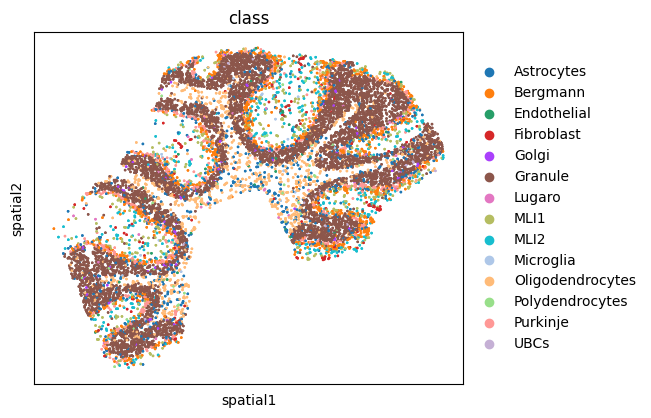

In [123]:
sq.pl.spatial_scatter(
        slideAnn,
        shape=None,
        color = "class",
        size=3,
    save="/Users/brendan/Desktop/slideseq.png"
)

Astrocytes
0
Bergmann
1
Endothelial
2
Fibroblast
3
Golgi
4
Granule
5
Lugaro
6
MLI1
7
MLI2
8


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm'

Microglia
9
Oligodendrocytes
10
Polydendrocytes
11
Purkinje
12
UBCs
13
['Astrocytes', 'Bergmann', 'Endothelial', 'Fibroblast', 'Golgi', 'Granule', 'Lugaro', 'MLI1', 'MLI2', 'Microglia', 'Oligodendrocytes', 'Polydendrocytes', 'Purkinje', 'UBCs']
14


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm'

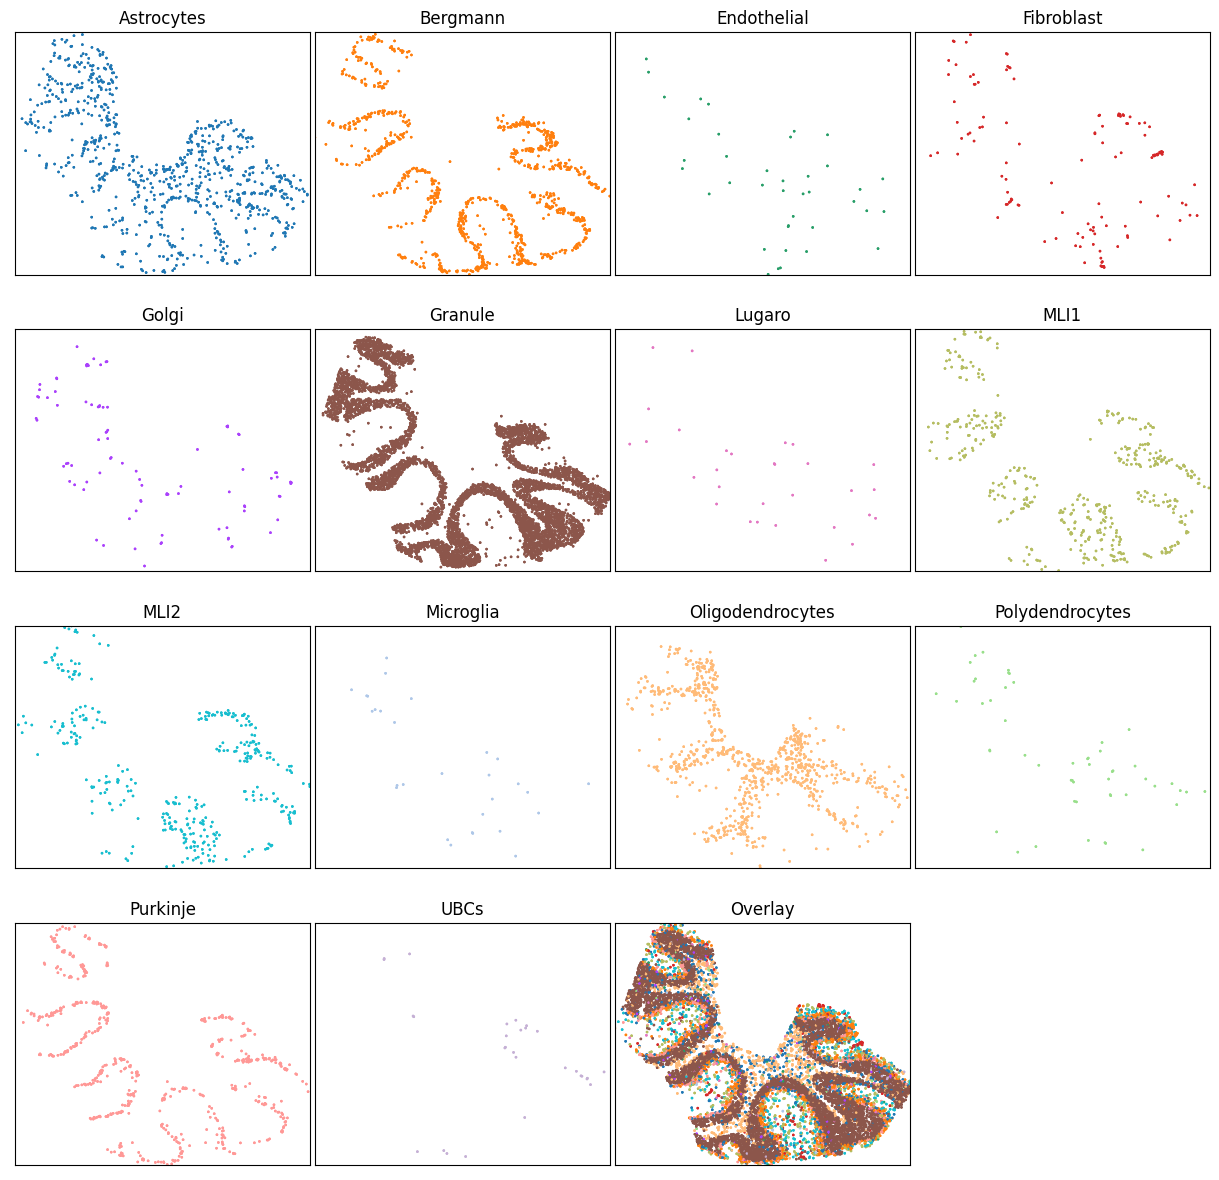

In [125]:
ncol = 4
nrow = 4
cts = list(np.unique(slideAnn.obs["class"]))
cts.append(list(np.unique(slideAnn.obs["class"])))

fig = plt.figure(figsize=(12,12))

for index, ct in enumerate(cts):
    print(ct)
    print(index)
    if index == 14:
        title = "Overlay"
    else:
        title = ct 
    ax = fig.add_subplot(nrow, ncol, index+1)
    sq.pl.spatial_scatter(
        slideAnn,
        shape=None,
        color = "class",
        groups = ct,
        size=3,
        ax = ax,
        legend_loc=False
    )
    ax.set_title(label = title, size=12)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([np.min(slideAnn.obsm["spatial"], axis = 0)[0], np.max(slideAnn.obsm["spatial"], axis = 0)[0]])
    ax.set_ylim([np.min(slideAnn.obsm["spatial"], axis = 0)[1], np.max(slideAnn.obsm["spatial"], axis = 0)[1]])

fig.tight_layout(pad=0)
plt.savefig("/Users/brendan/Desktop/slideseq_full.png")



# Co occurance

In [17]:
sq.gr.co_occurrence(slideAnn, cluster_key="class")

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.86s/]


In [19]:
slideAnn.uns

OverloadedDict, wrapping:
	OrderedDict([('class_colors', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']), ('class_co_occurrence', {'occ': array([[[1.1460446 , 1.1689694 , 1.1306137 , ..., 1.0058687 ,
         0.97416055, 0.99265146],
        [1.0777187 , 0.9719017 , 0.88956064, ..., 1.0398461 ,
         1.0328414 , 1.0372667 ],
        [1.5381879 , 1.1411743 , 0.96356153, ..., 1.0862584 ,
         1.1222553 , 1.1028755 ],
        ...,
        [1.4235779 , 1.403379  , 1.4782351 , ..., 0.8634632 ,
         0.92032063, 0.958749  ],
        [1.1153847 , 1.0002301 , 0.96397823, ..., 1.0615909 ,
         1.120729  , 1.0666242 ],
        [1.228237  , 1.3016409 , 1.2286919 , ..., 0.9996089 ,
         0.83354515, 0.93841463]],

       [[1.0777185 , 0.9719017 , 0.8895607 , ..., 1.0398461 ,
         1.0328417 , 1.0372666 ],
        [2.0080266 , 1.5926372 , 1.3588573 , ..., 0.97986674,
     

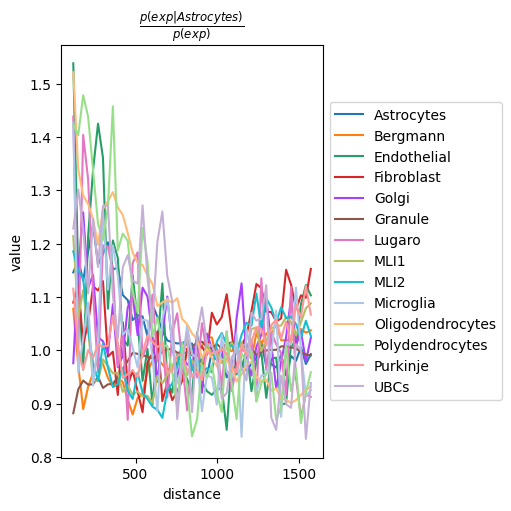

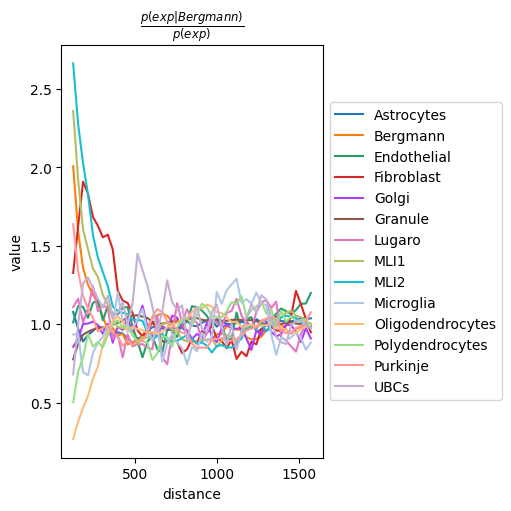

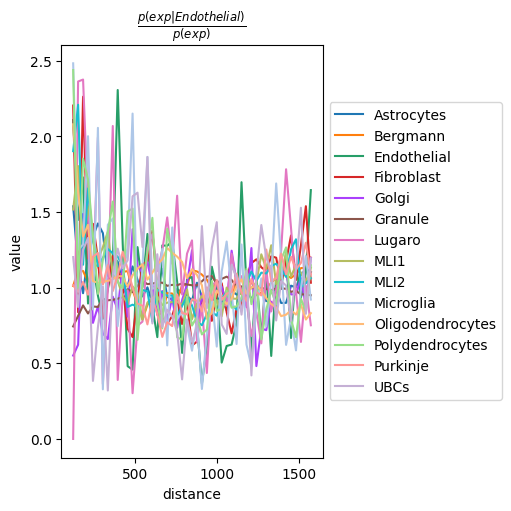

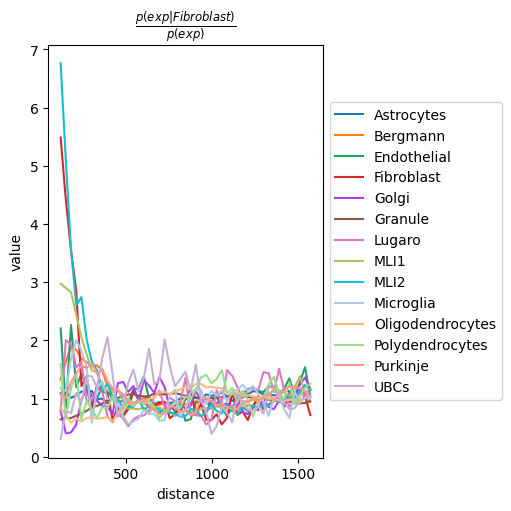

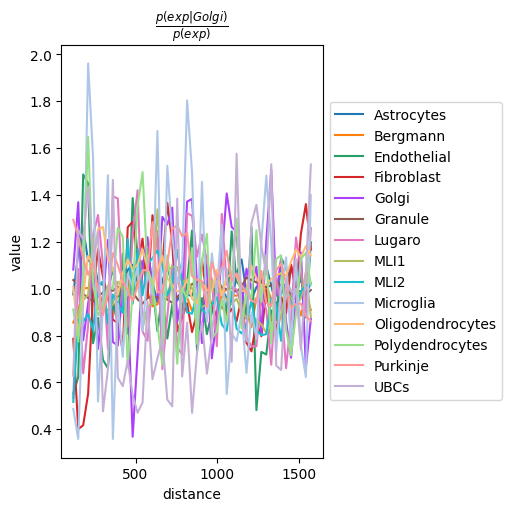

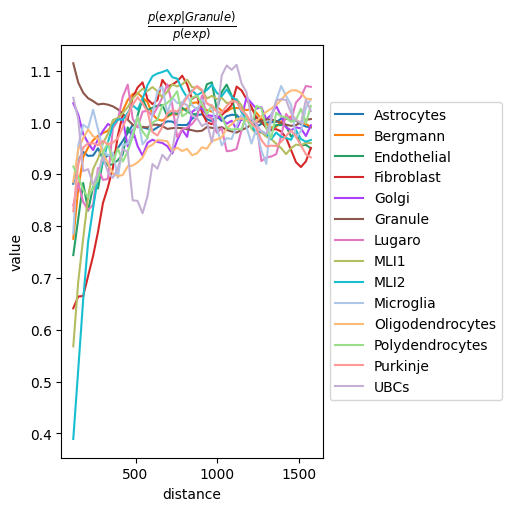

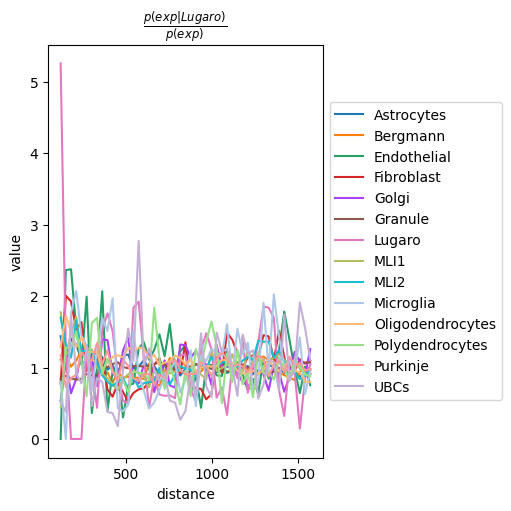

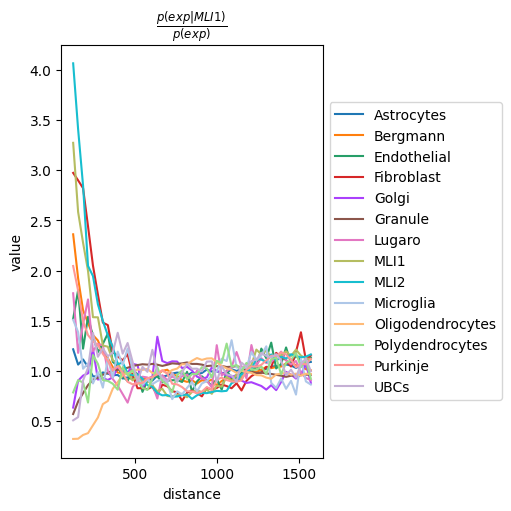

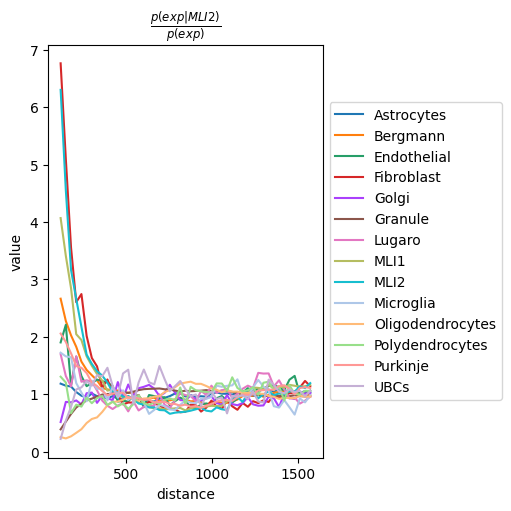

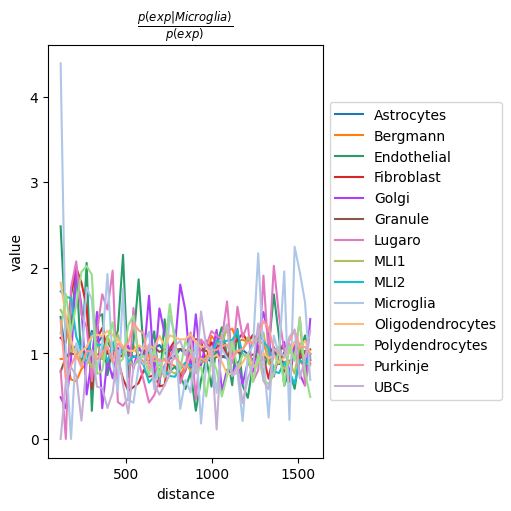

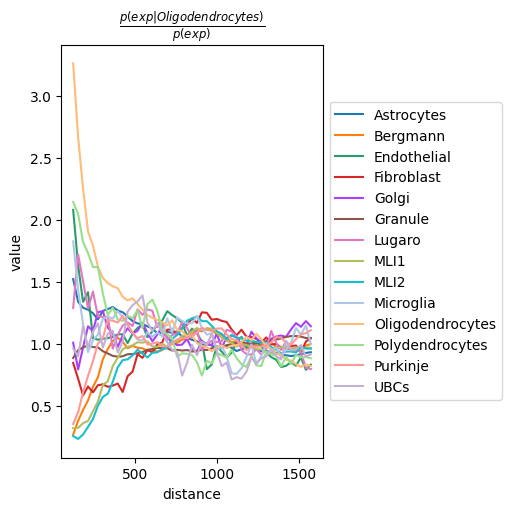

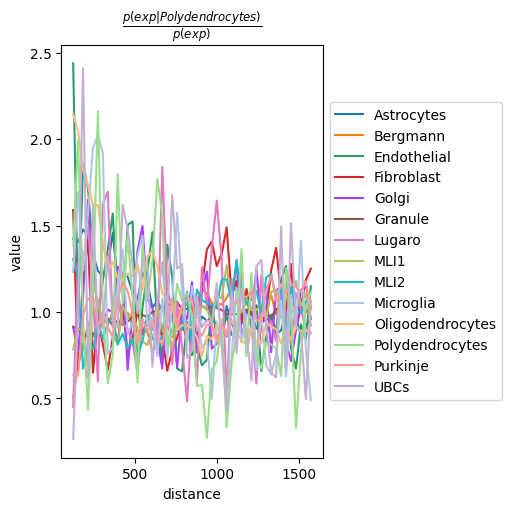

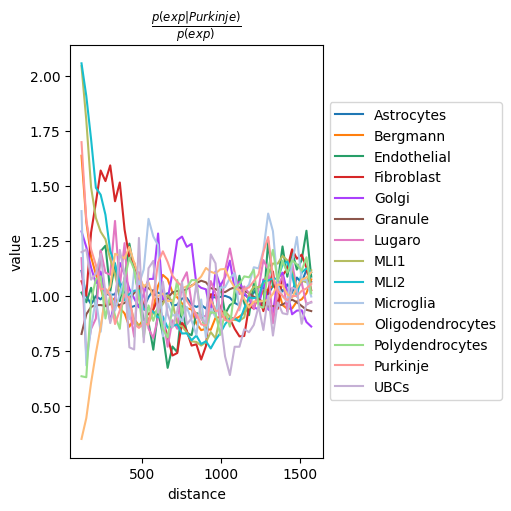

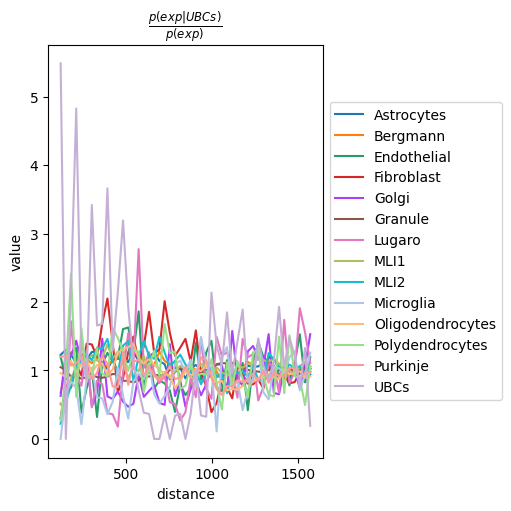

In [20]:
for ct in np.unique(slideAnn.obs["class"]):
    sq.pl.co_occurrence(slideAnn, cluster_key="class", clusters=ct)

# Spatial neighbors

In [21]:
sq.gr.spatial_neighbors(slideAnn, delaunay=False, coord_type="generic", key_added="nn6") ## 6 by default
sq.gr.spatial_neighbors(slideAnn, delaunay=False, coord_type="generic", n_neighs=20, key_added="nn20") ## 6 by default
sq.gr.spatial_neighbors(slideAnn, delaunay=True, coord_type="generic", key_added="delaunay") ## 6 by default
sq.gr.spatial_neighbors(slideAnn, delaunay=False, radius=30, coord_type="generic", key_added="r30")
sq.gr.spatial_neighbors(slideAnn, delaunay=False, radius=50, coord_type="generic", key_added="r50")
sq.gr.spatial_neighbors(slideAnn, delaunay=False, radius=100, coord_type="generic", key_added="r100")

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


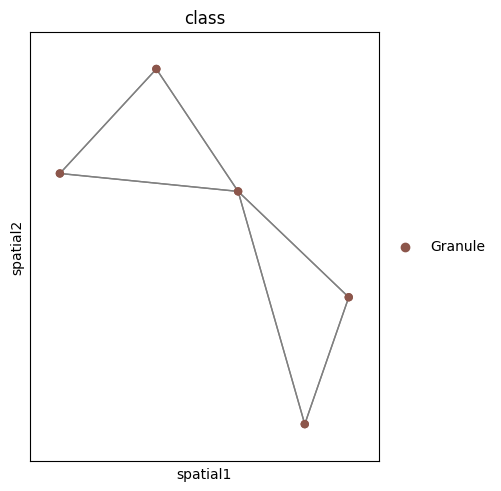

In [22]:
_, idx = slideAnn.obsp["nn6_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(slideAnn[idx, :],
                      shape=None,
                      color="class",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="nn6_connectivities",
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


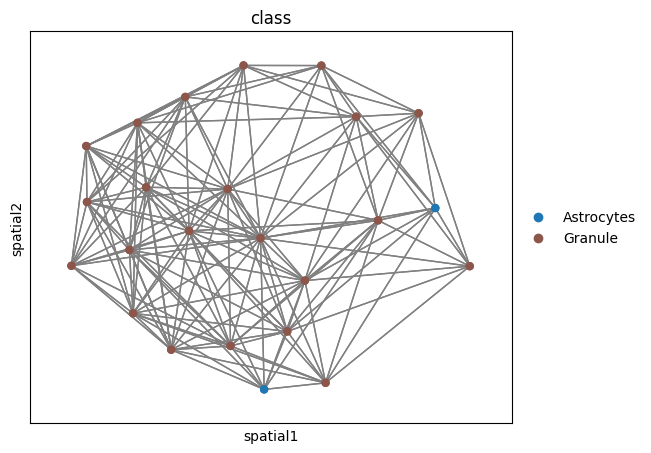

In [23]:
_, idx = slideAnn.obsp["nn20_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(slideAnn[idx, :],
                      shape=None,
                      color="class",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="nn20_connectivities",
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


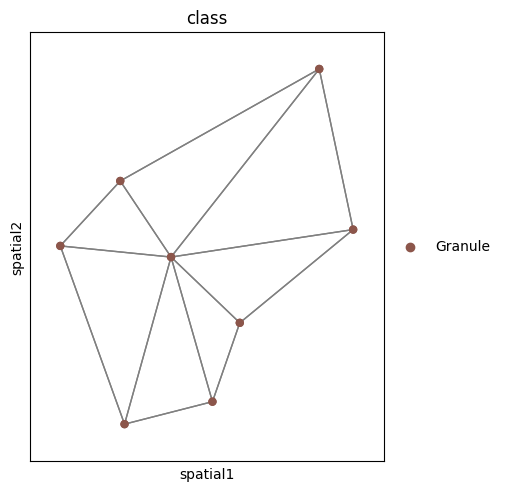

In [24]:
_, idx = slideAnn.obsp["delaunay_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(slideAnn[idx, :],
                      shape=None,
                      color="class",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="delaunay_connectivities",
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


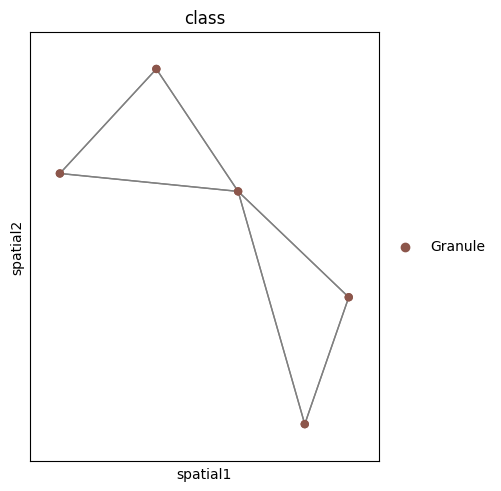

In [25]:
_, idx = slideAnn.obsp["r30_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(slideAnn[idx, :],
                      shape=None,
                      color="class",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="r30_connectivities",
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


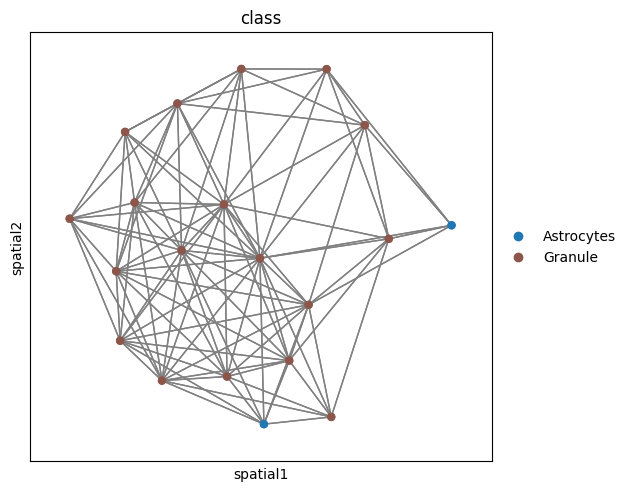

In [26]:
_, idx = slideAnn.obsp["r50_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(slideAnn[idx, :],
                      shape=None,
                      color="class",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="r50_connectivities",
                      size=100)

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


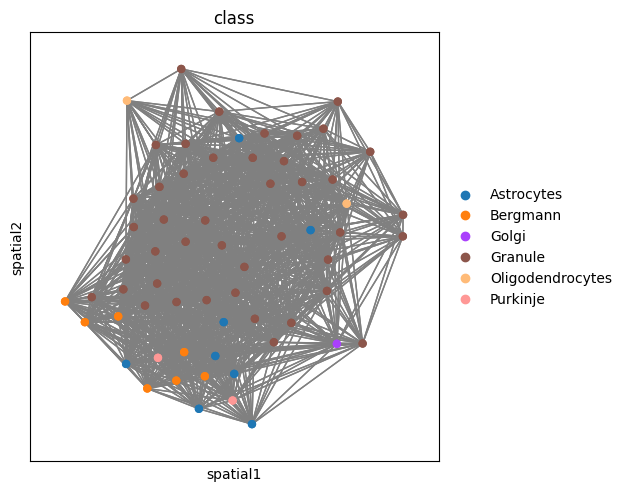

In [27]:
_, idx = slideAnn.obsp["r100_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(slideAnn[idx, :],
                      shape=None,
                      color="class",
                      spatial_key="spatial", ## the only thing in .obsm
                      connectivity_key="r100_connectivities",
                      size=100)

# Neighborhood enrichment

## nn6

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 129.45/s]


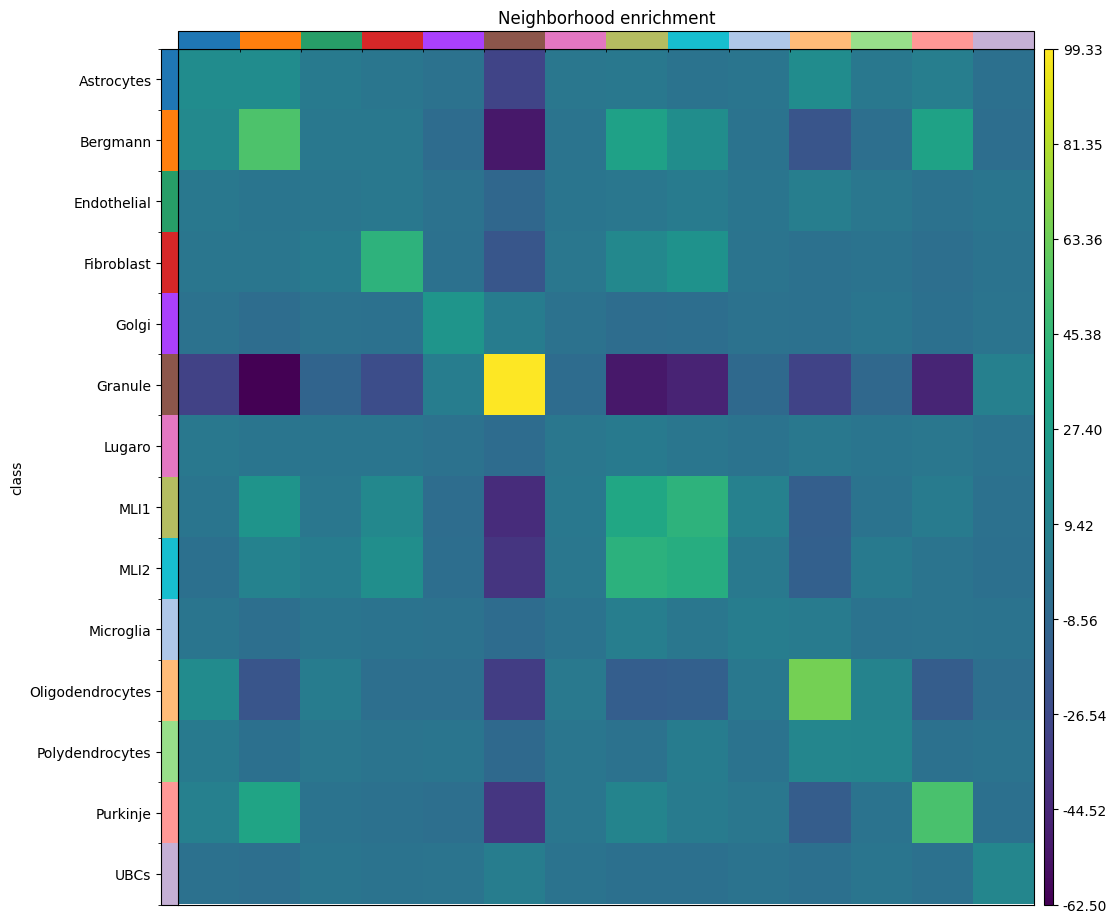

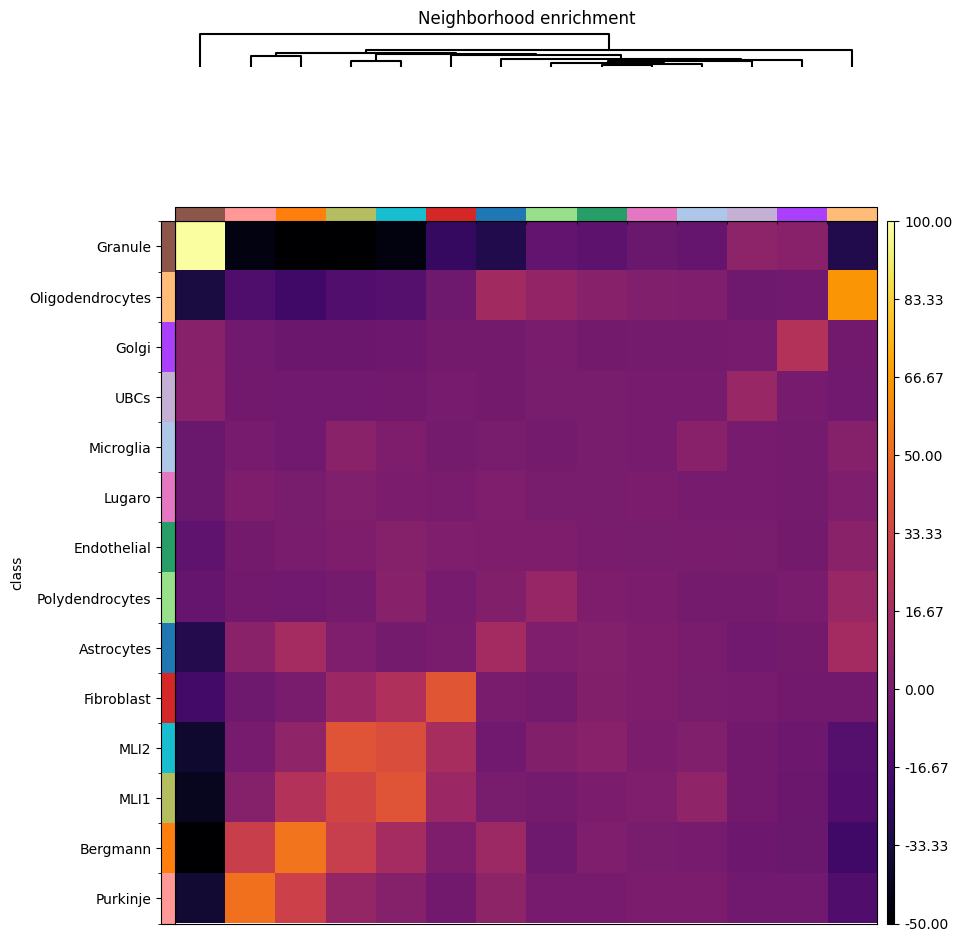

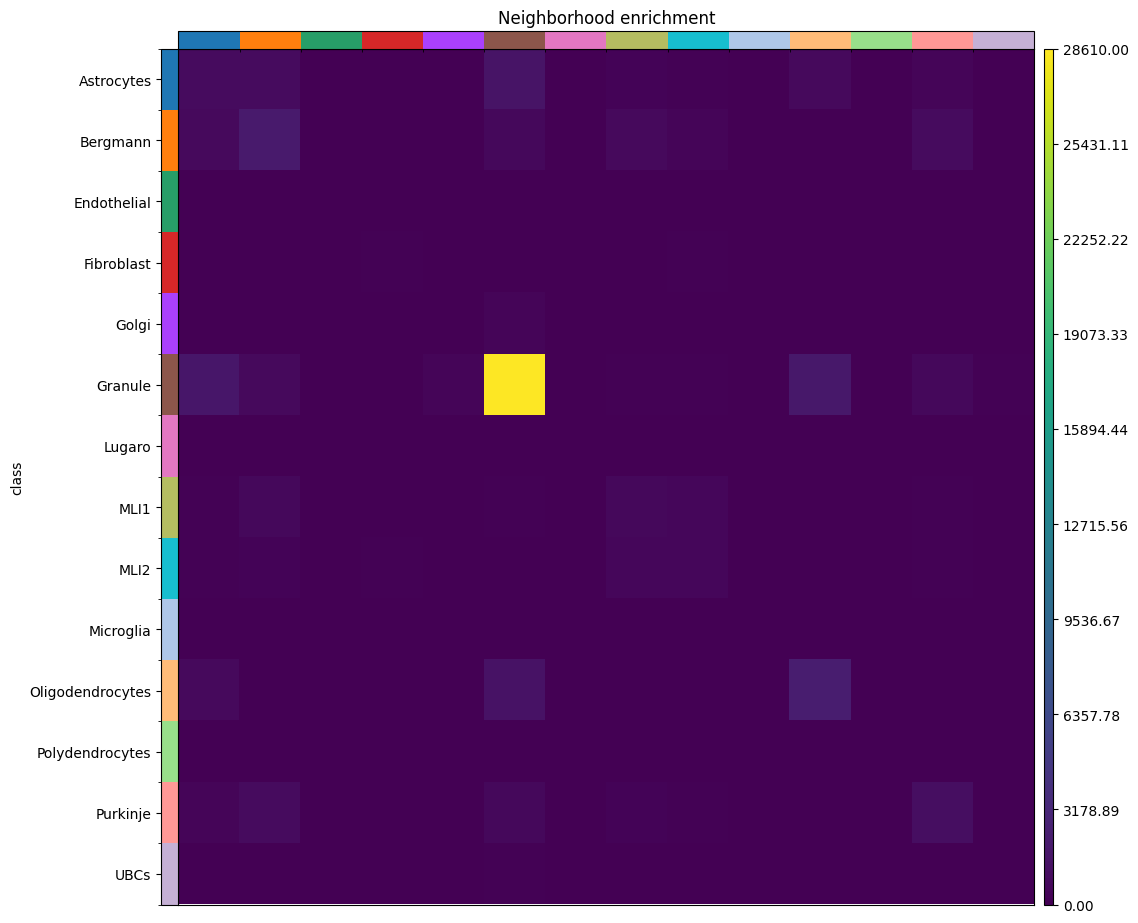

In [28]:
sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="nn6")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="count")

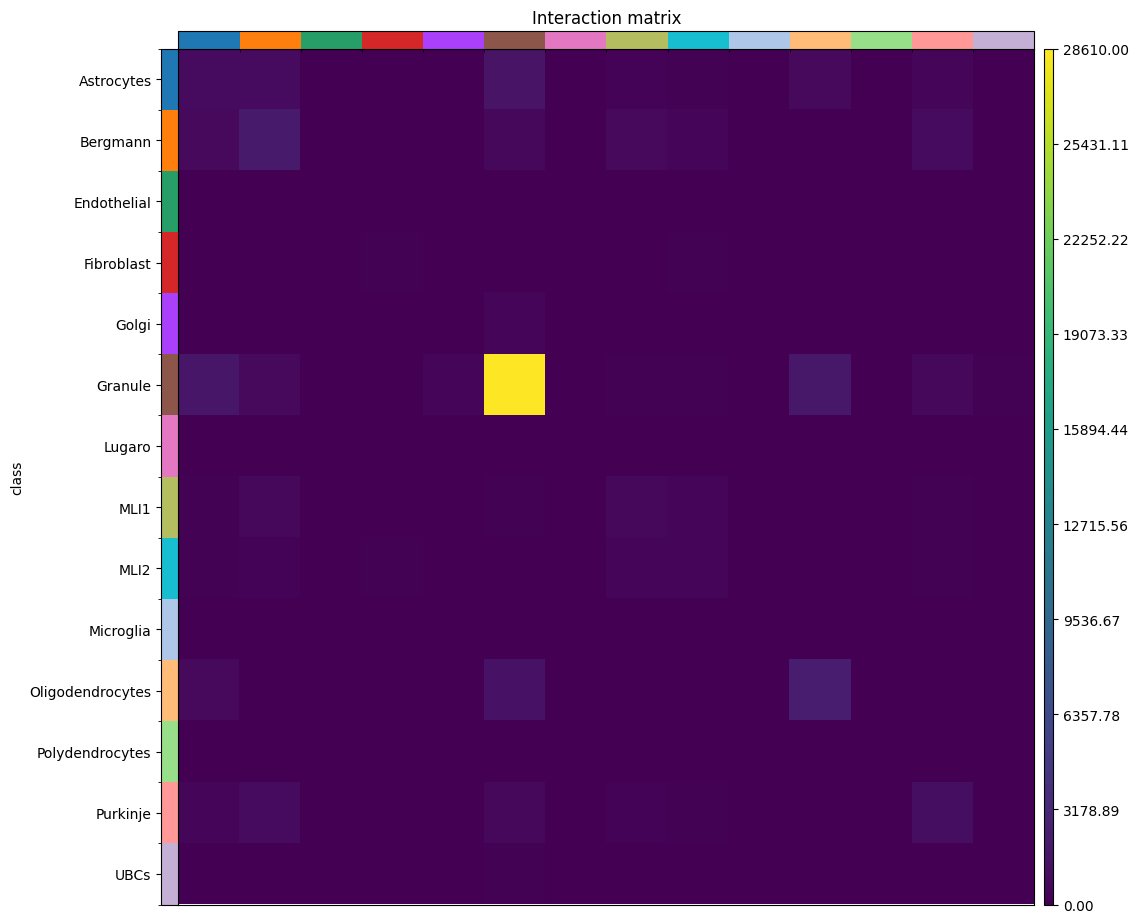

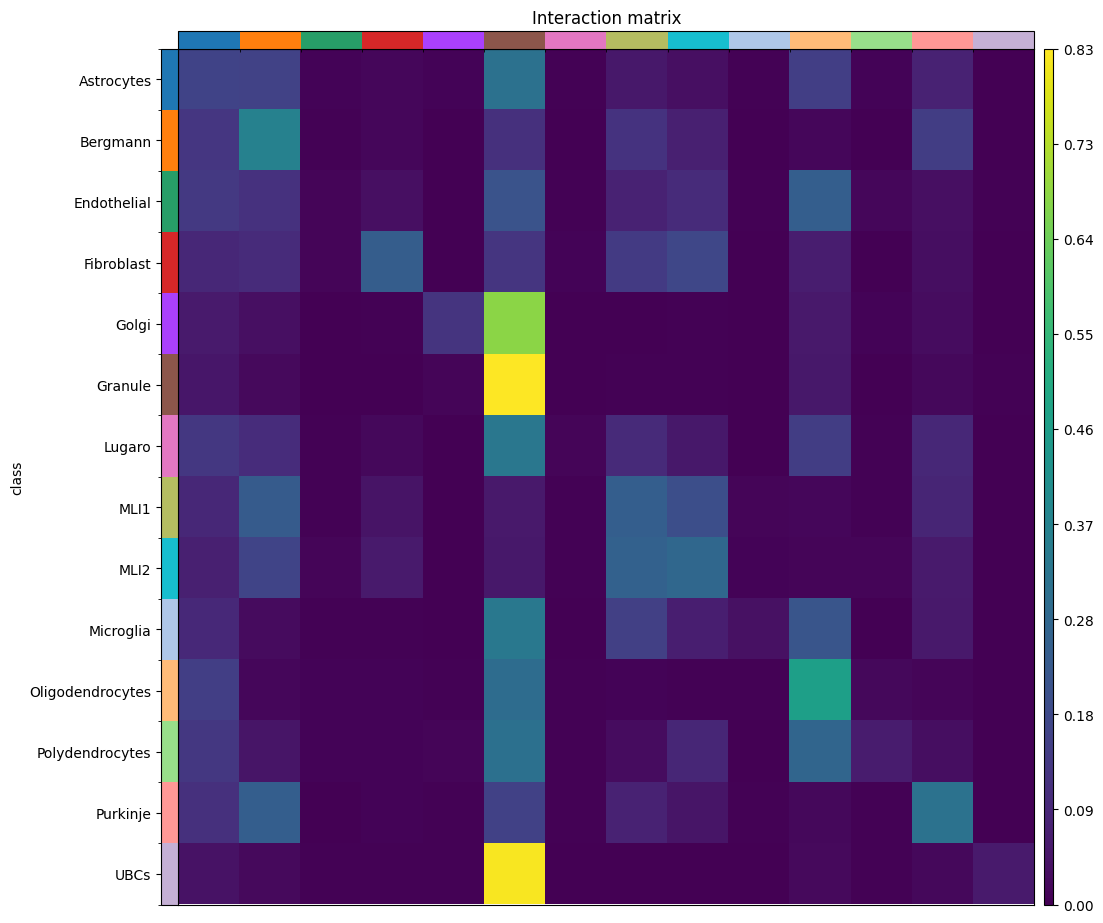

In [29]:
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="nn6")
sq.pl.interaction_matrix(slideAnn, cluster_key="class")
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="nn6", normalized=True)
sq.pl.interaction_matrix(slideAnn, cluster_key="class")

## nn20

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 197.59/s]


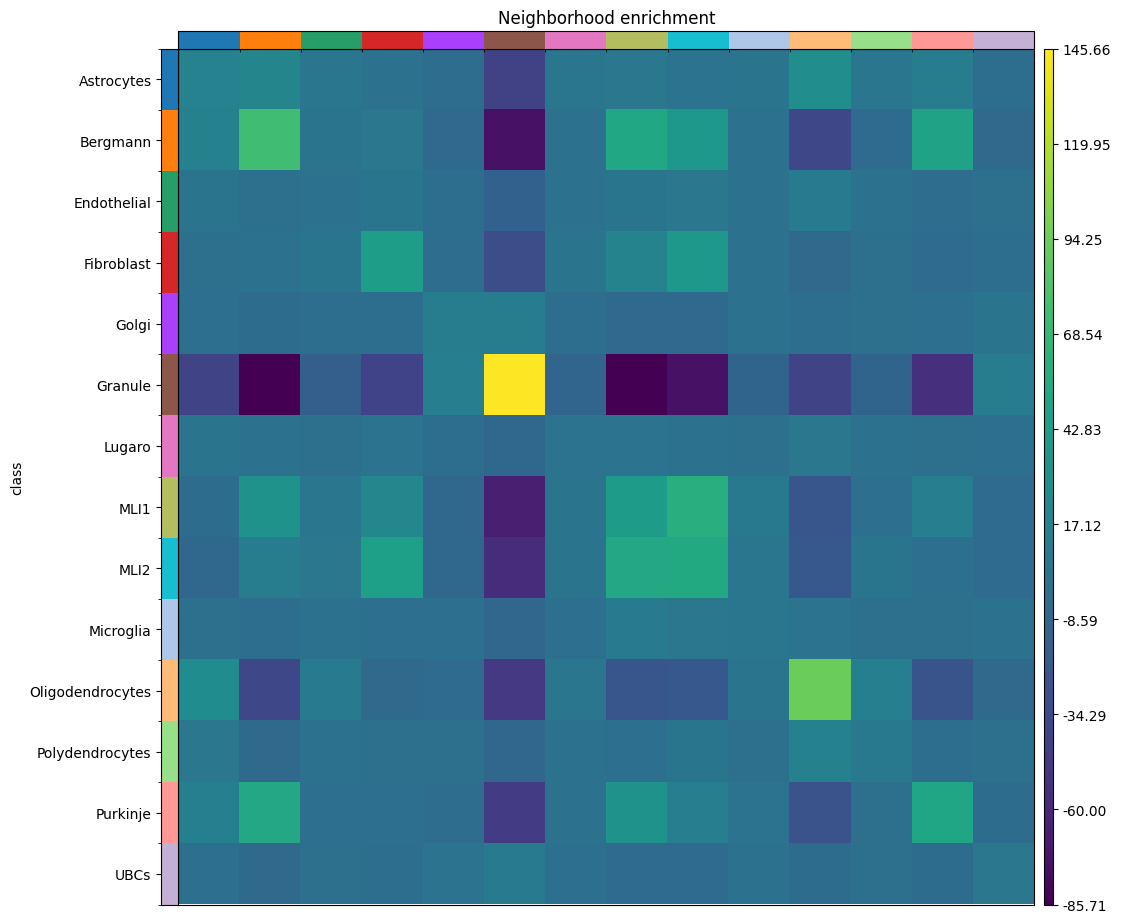

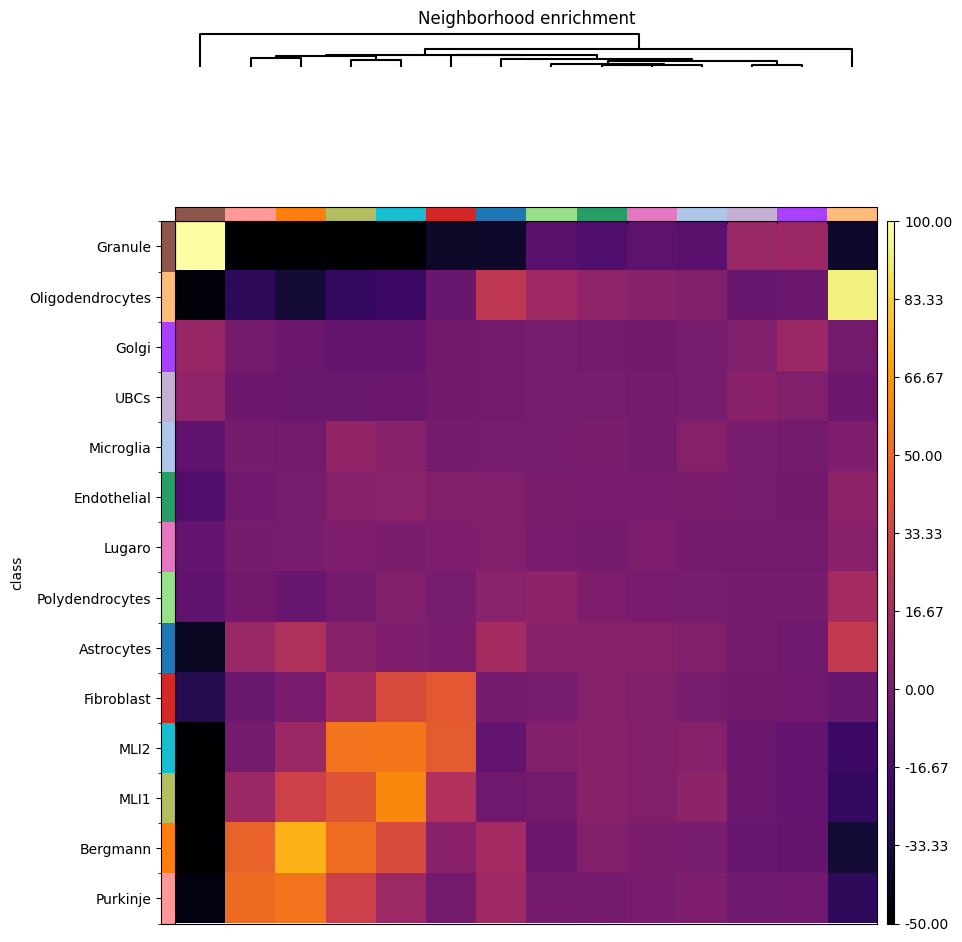

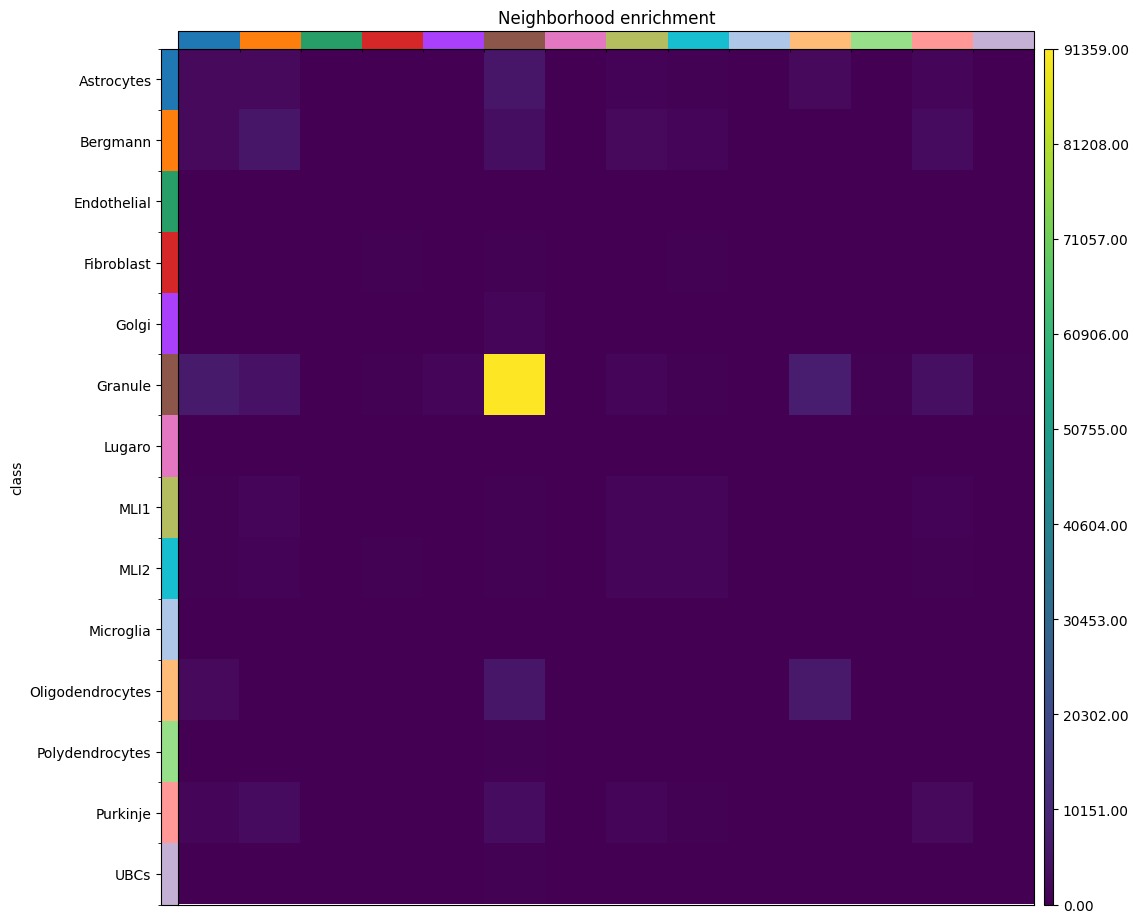

In [30]:
sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="nn20")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="count")

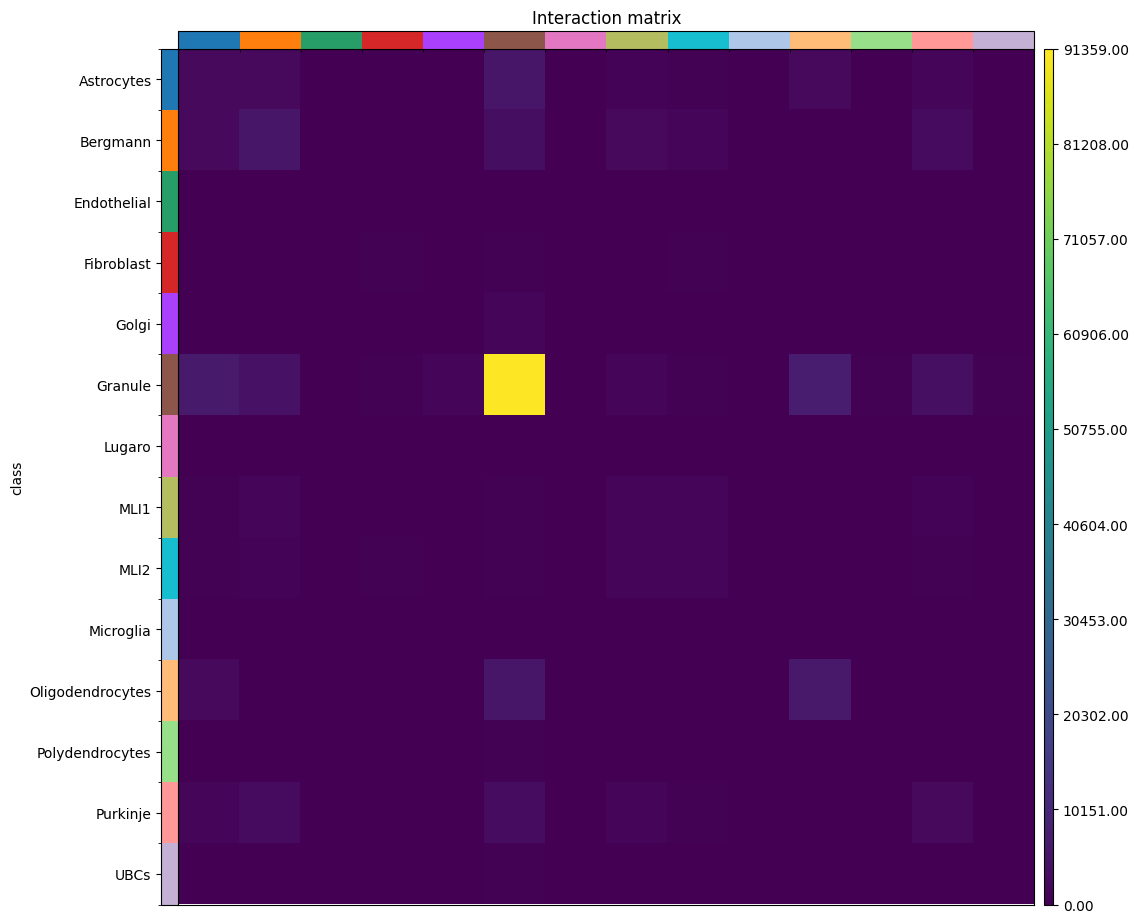

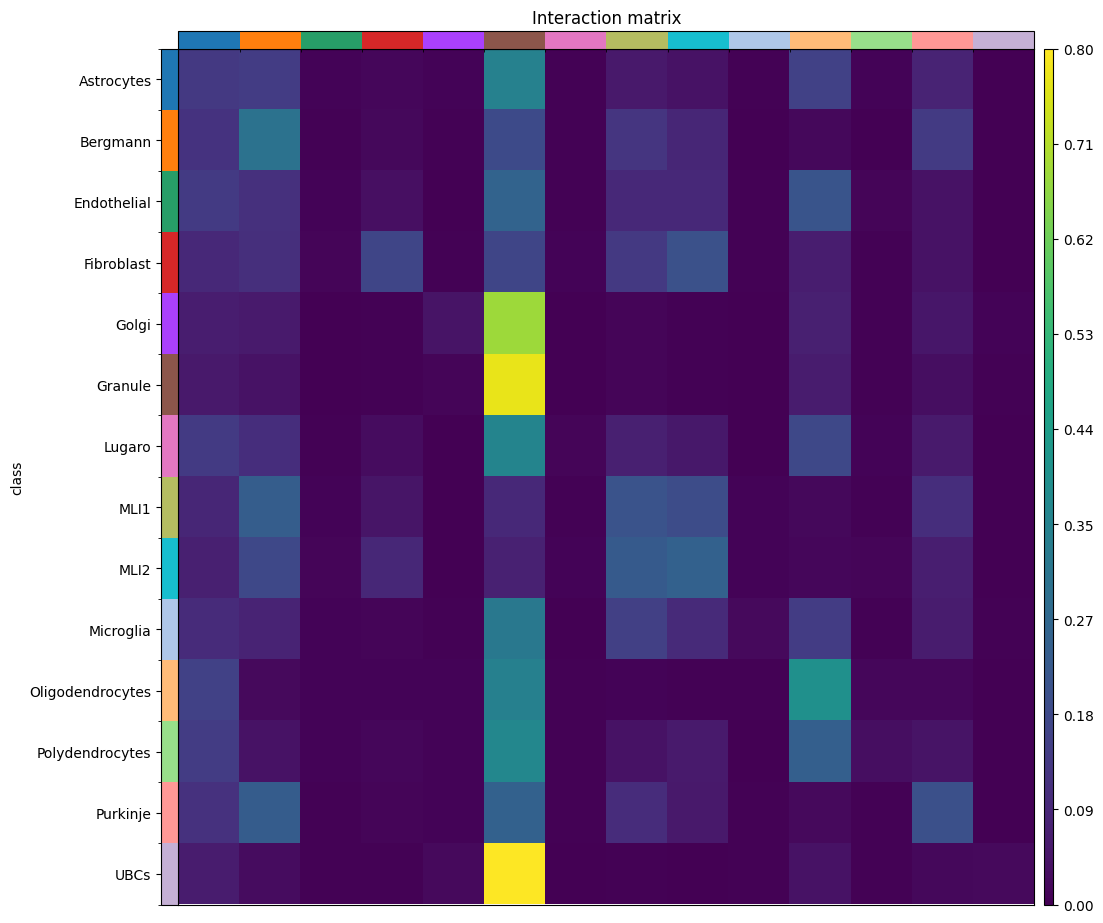

In [31]:
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="nn20")
sq.pl.interaction_matrix(slideAnn, cluster_key="class")
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="nn20", normalized=True)
sq.pl.interaction_matrix(slideAnn, cluster_key="class")

## delaunay

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.43/s]


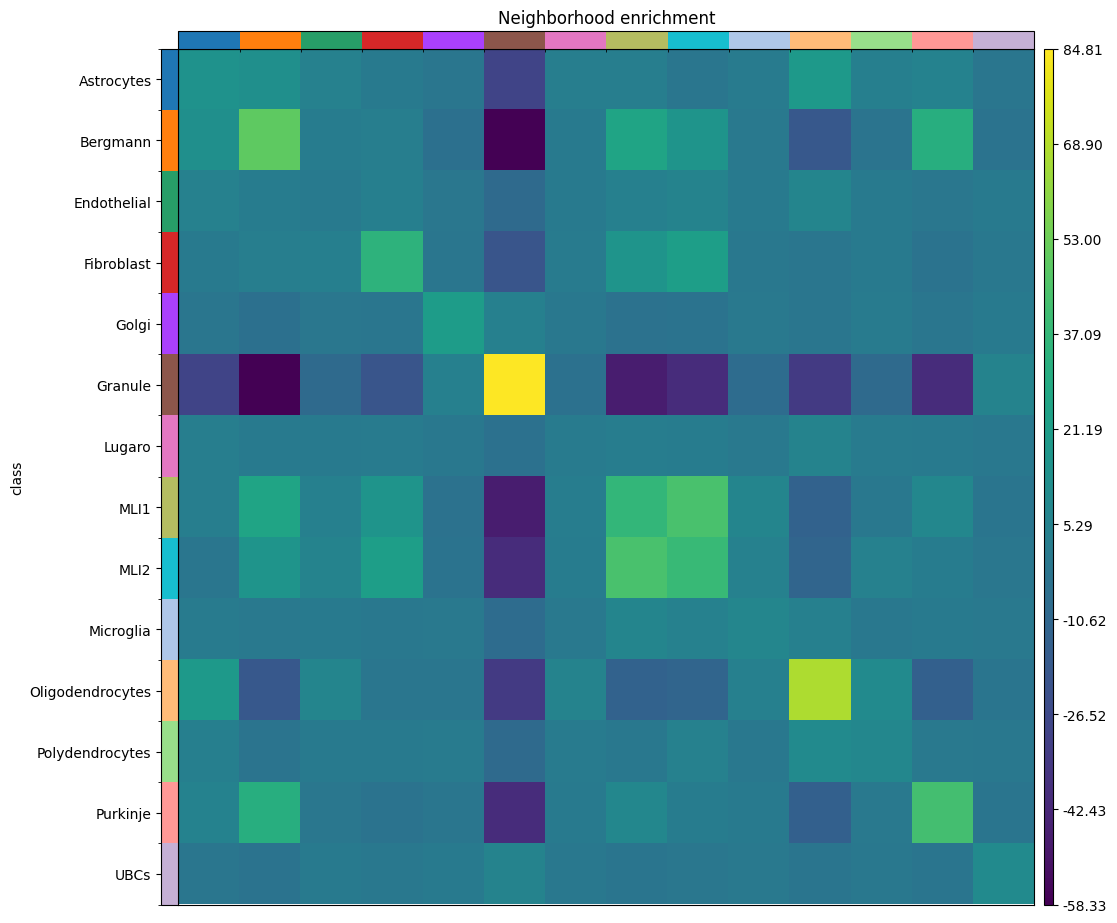

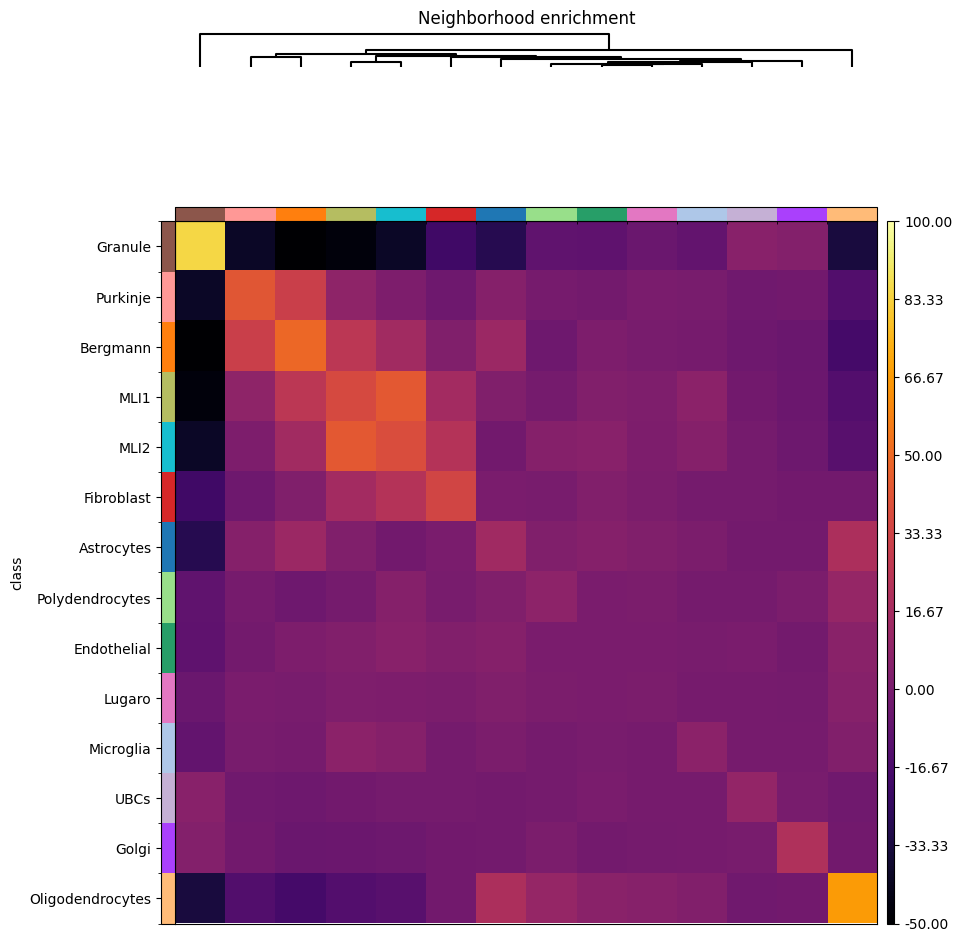

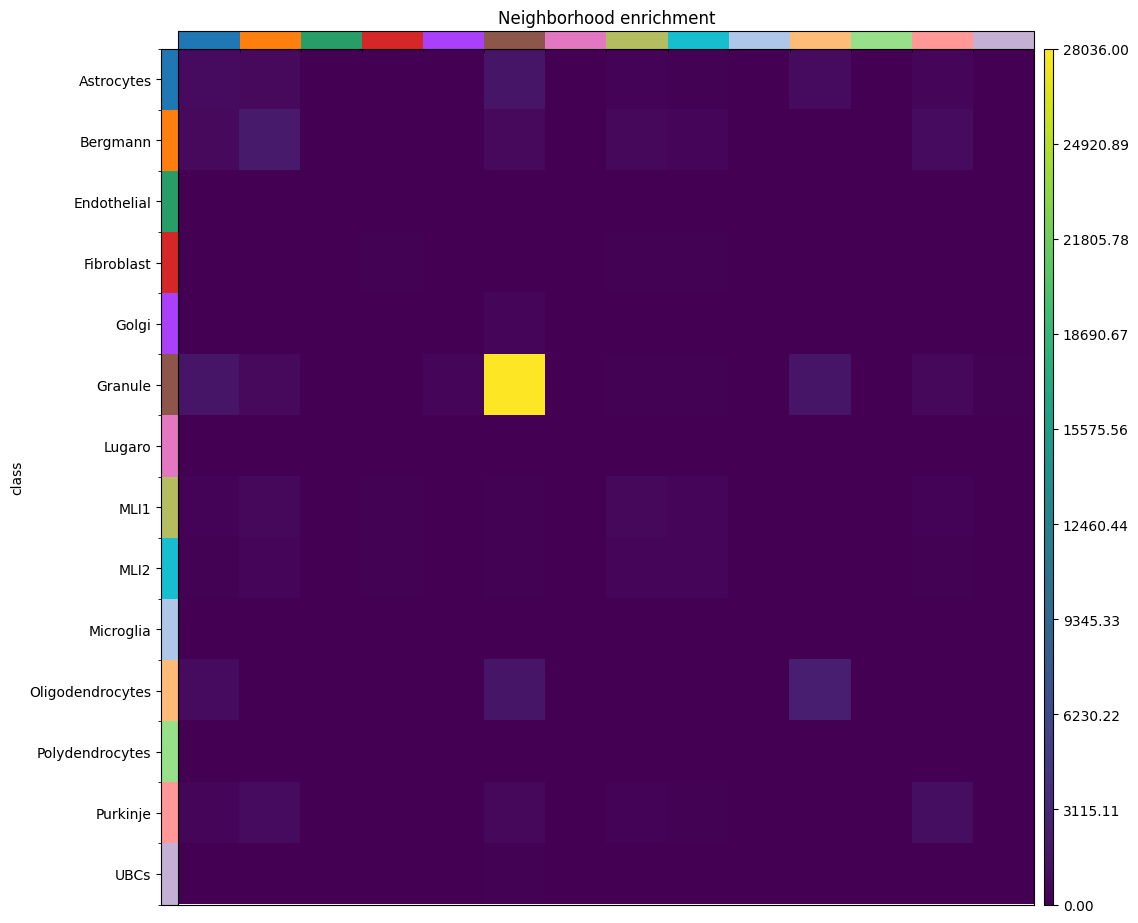

In [32]:
sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="delaunay")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="count")

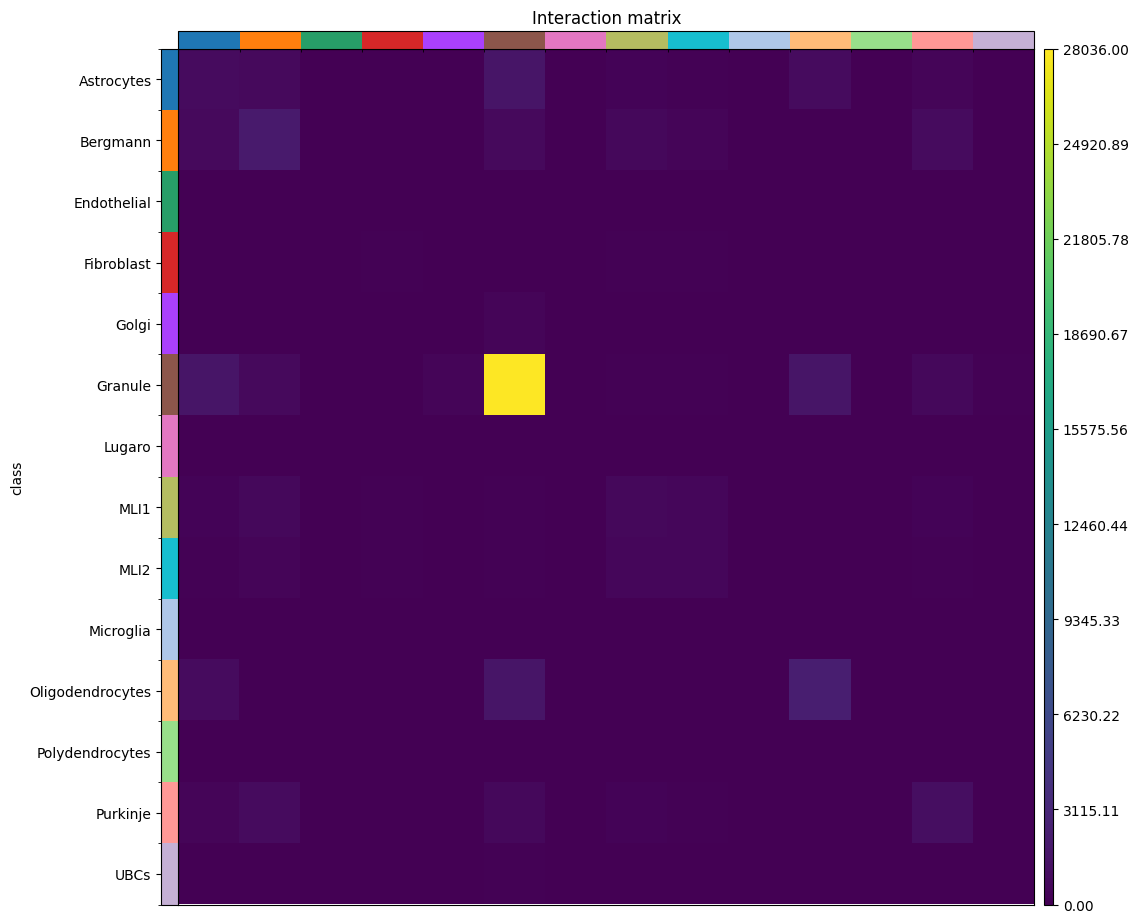

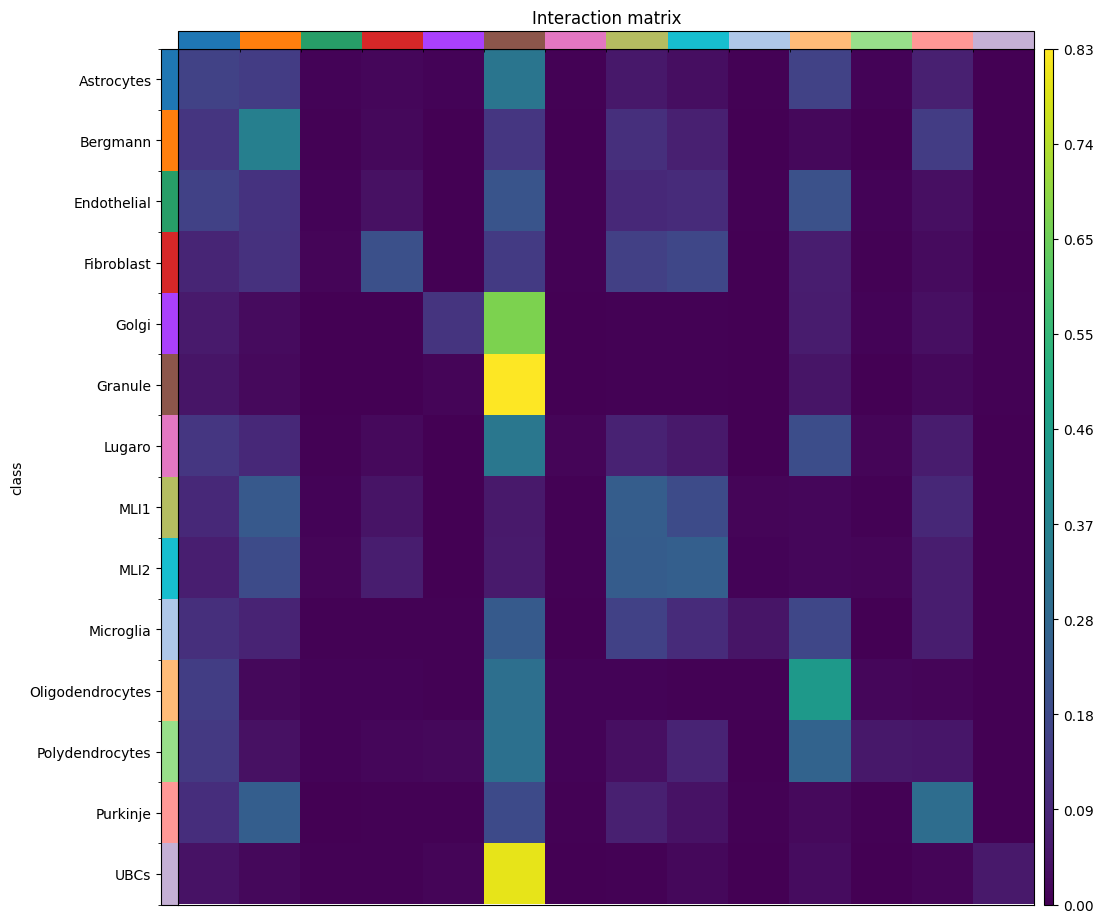

In [33]:
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="delaunay")
sq.pl.interaction_matrix(slideAnn, cluster_key="class")
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="delaunay", normalized=True)
sq.pl.interaction_matrix(slideAnn, cluster_key="class")

## r30

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 205.07/s]


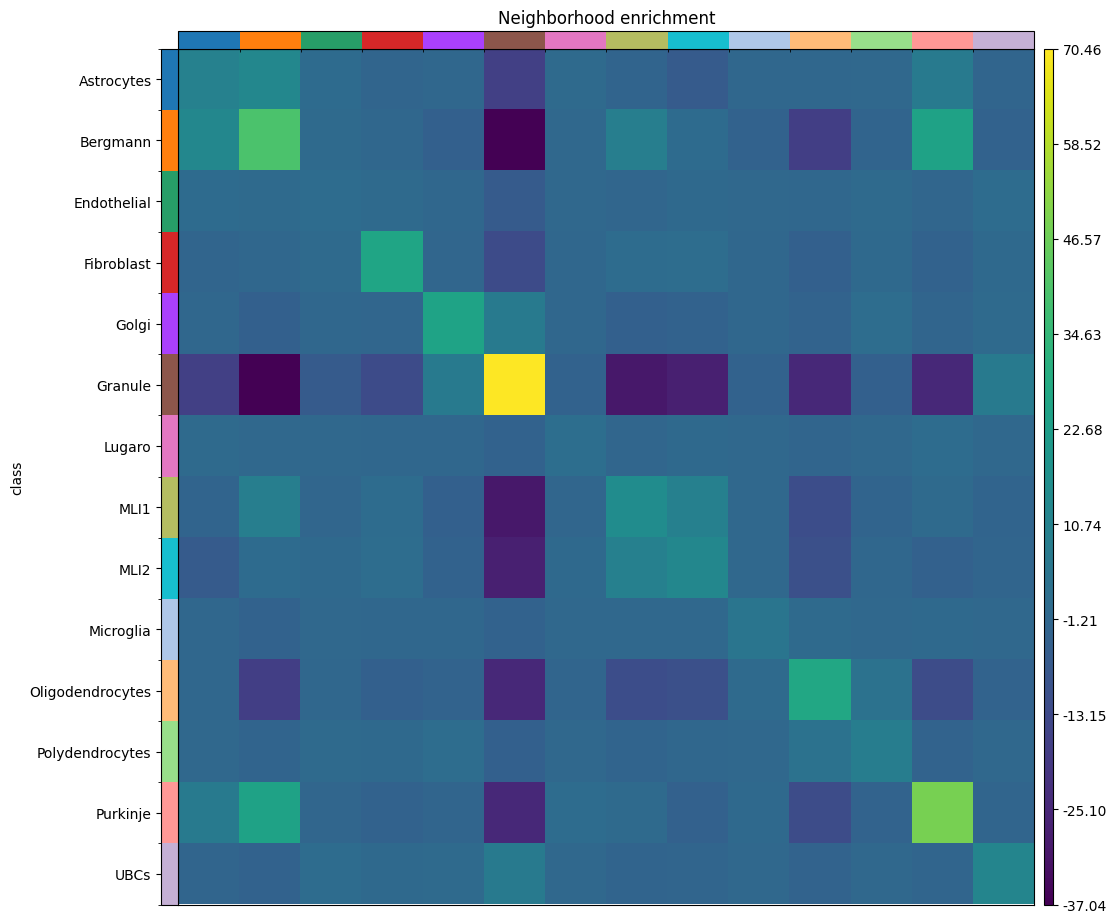

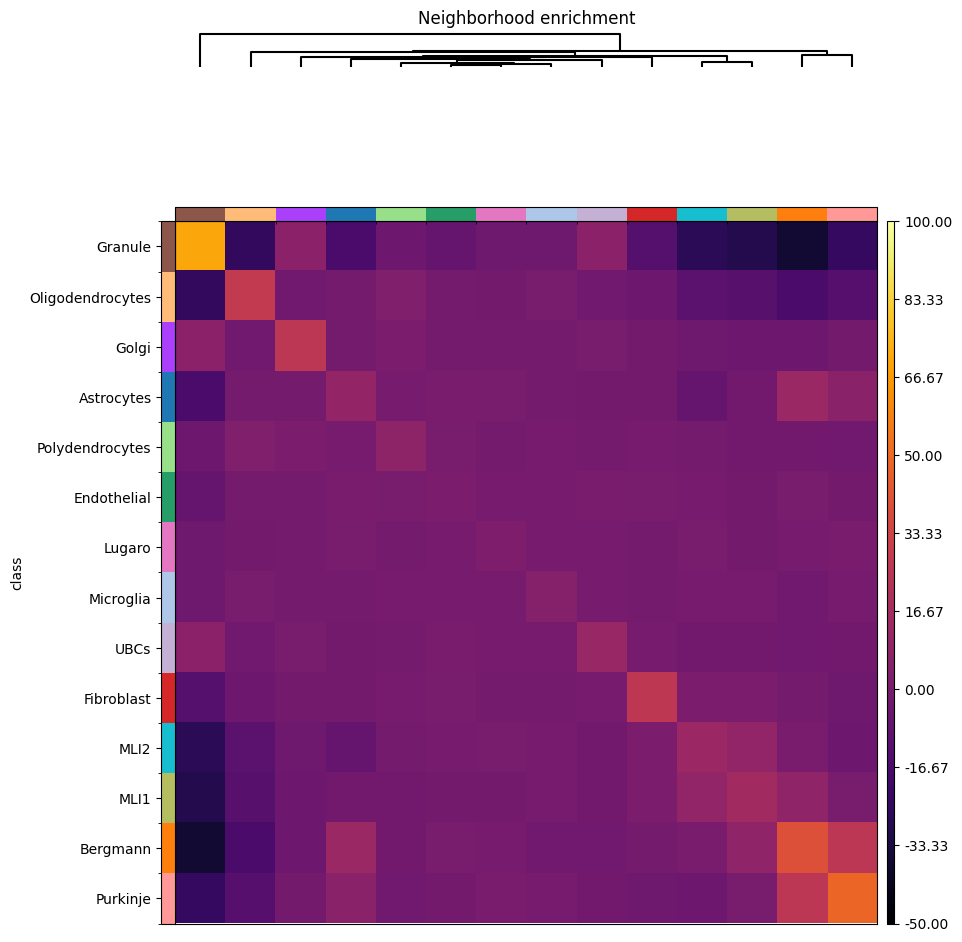

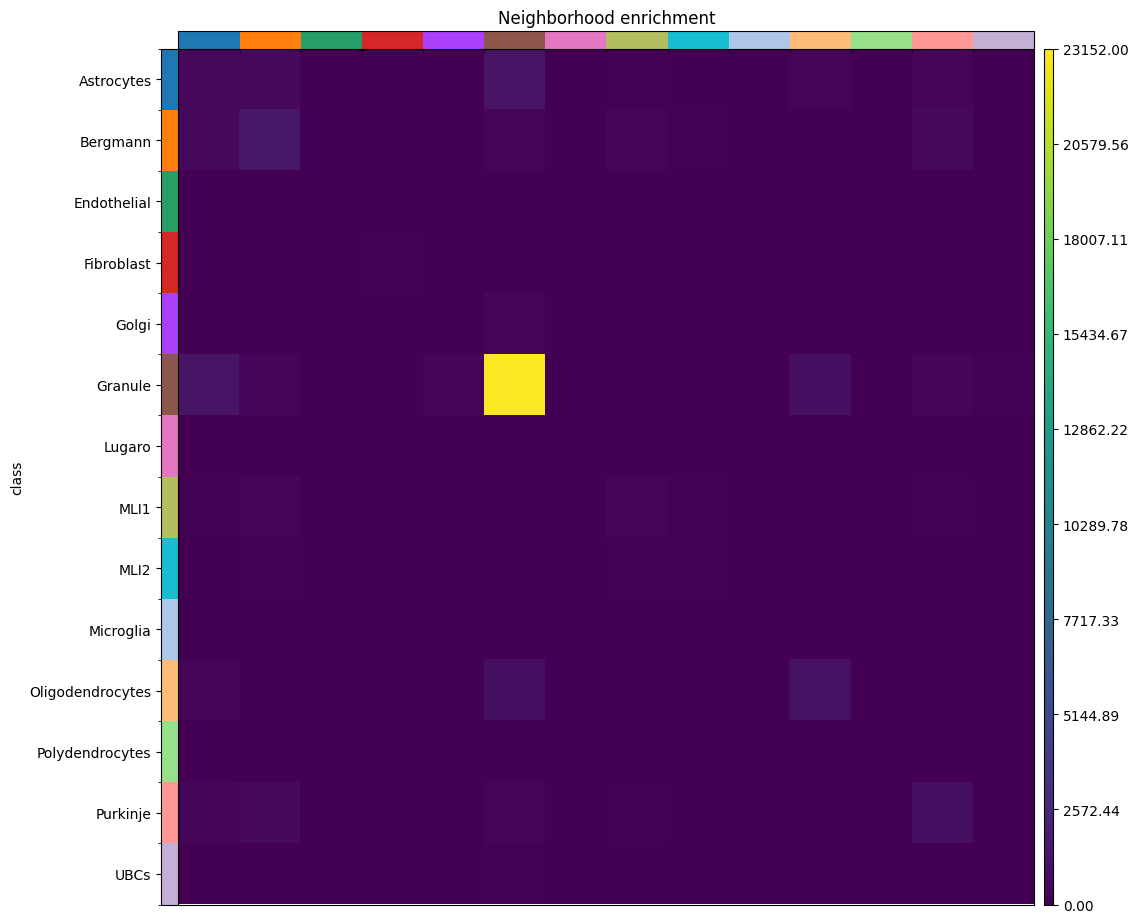

In [34]:
sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r30")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="count")

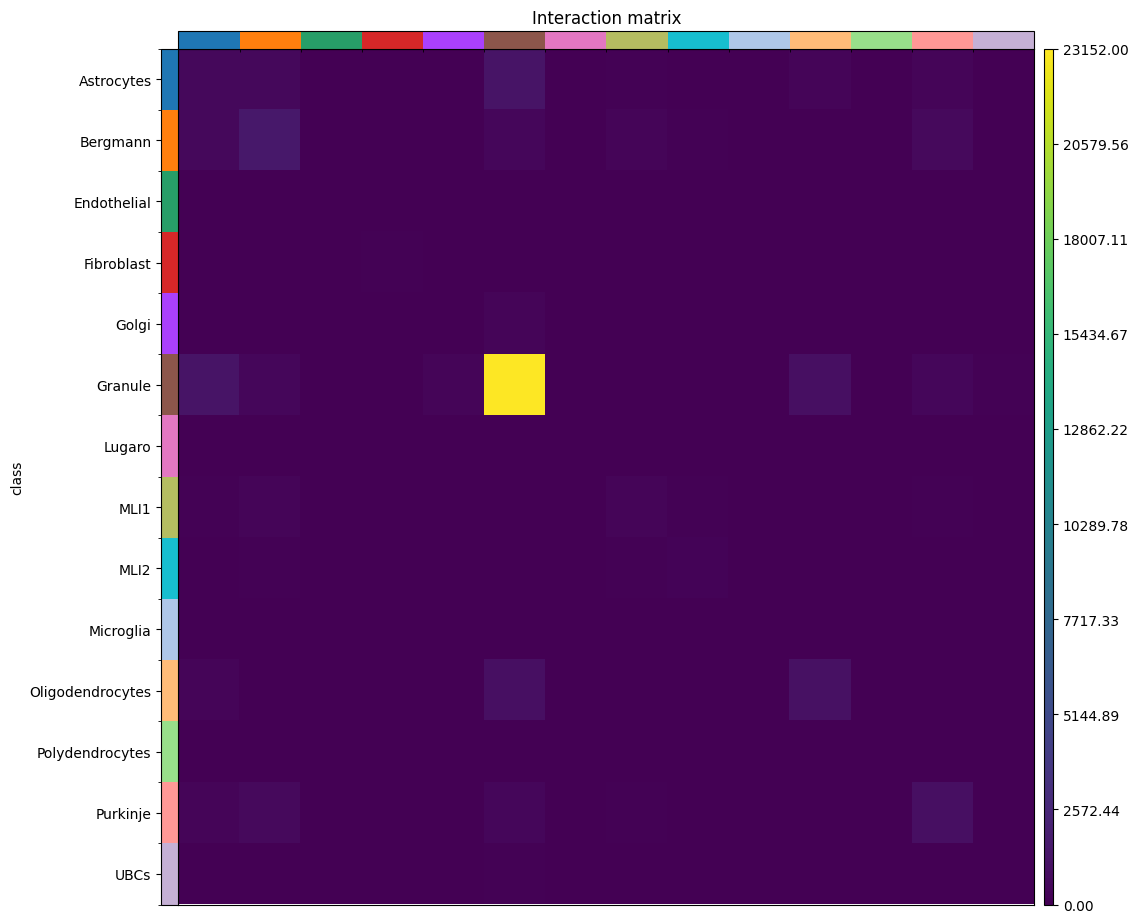

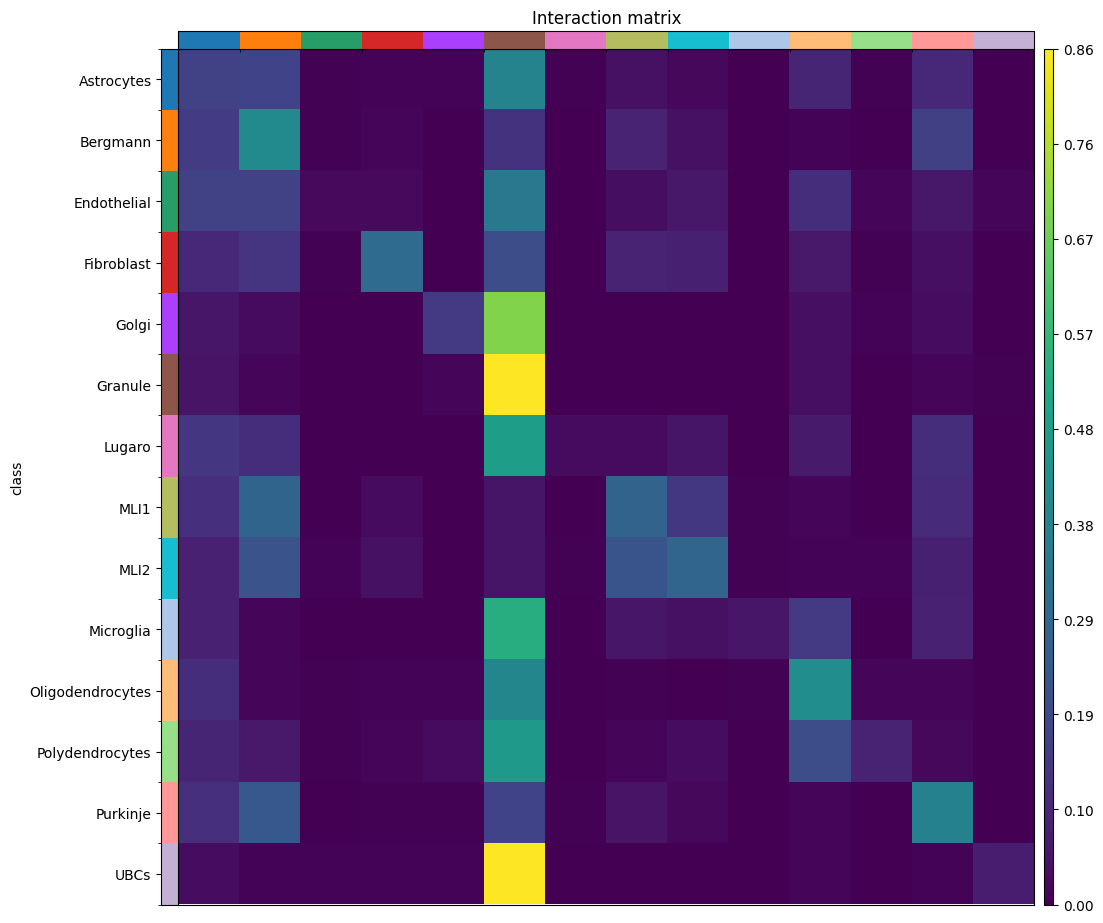

In [35]:
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="r30")
sq.pl.interaction_matrix(slideAnn, cluster_key="class")
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="r30", normalized=True)
sq.pl.interaction_matrix(slideAnn, cluster_key="class")

## r50

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 189.95/s]


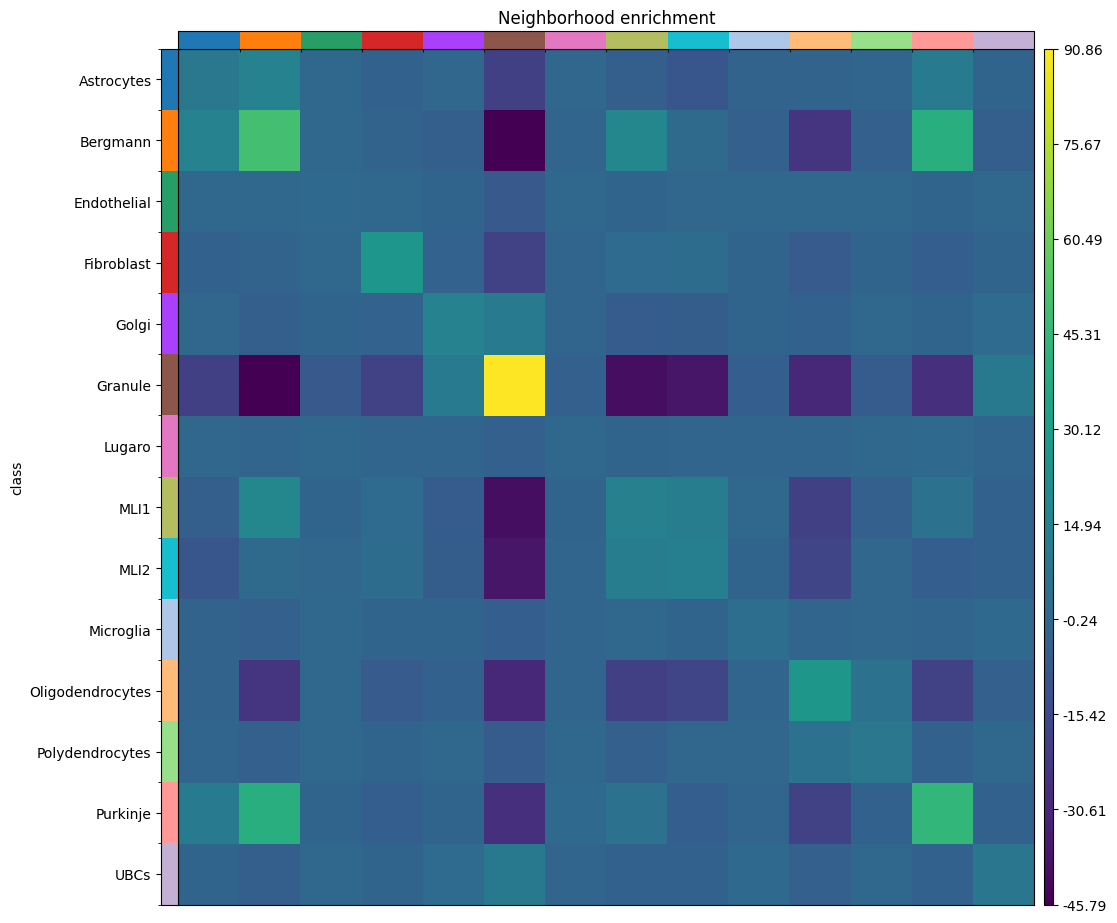

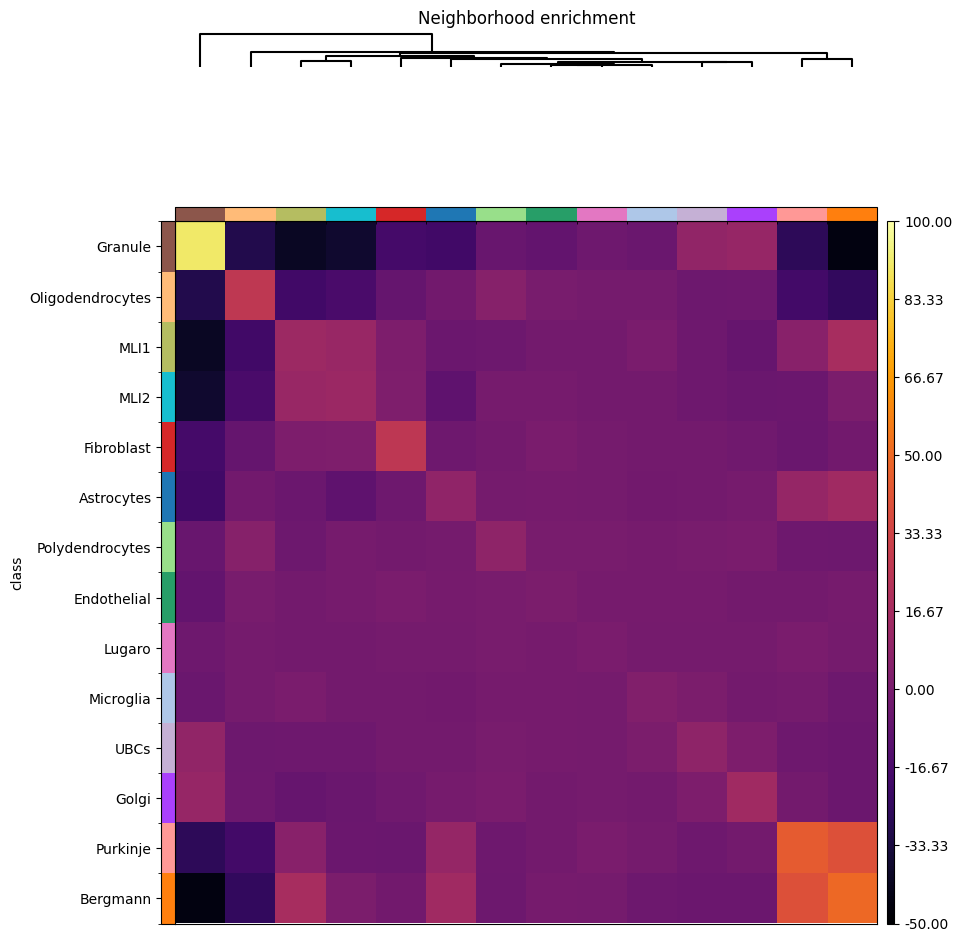

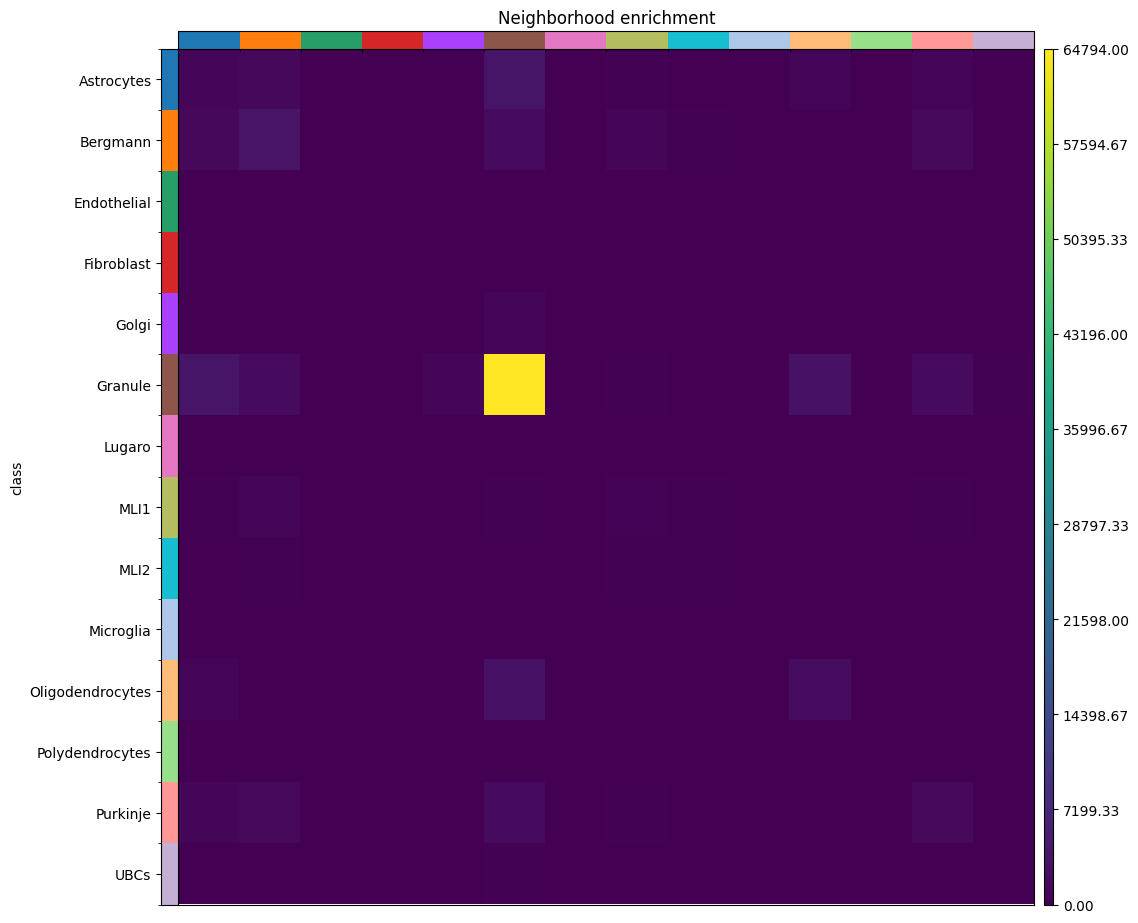

In [36]:
sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r50")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="count")

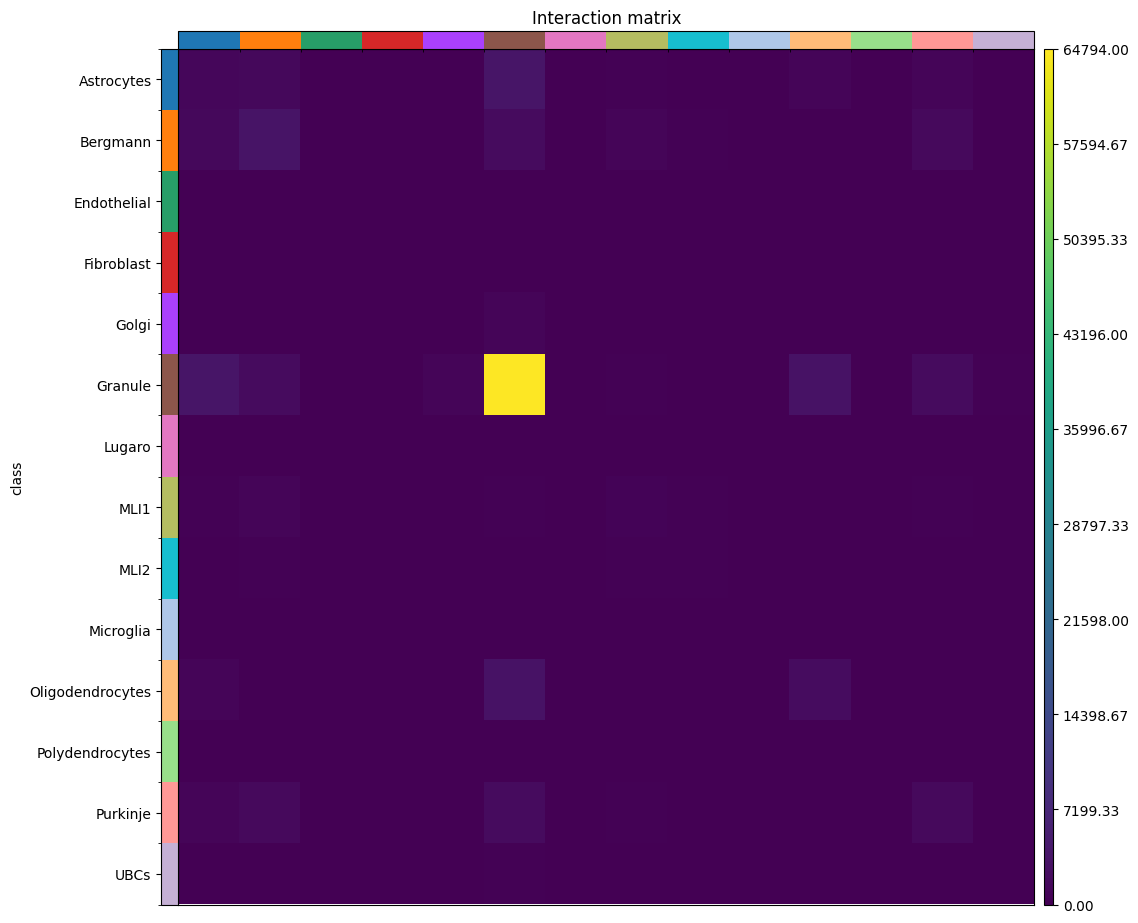

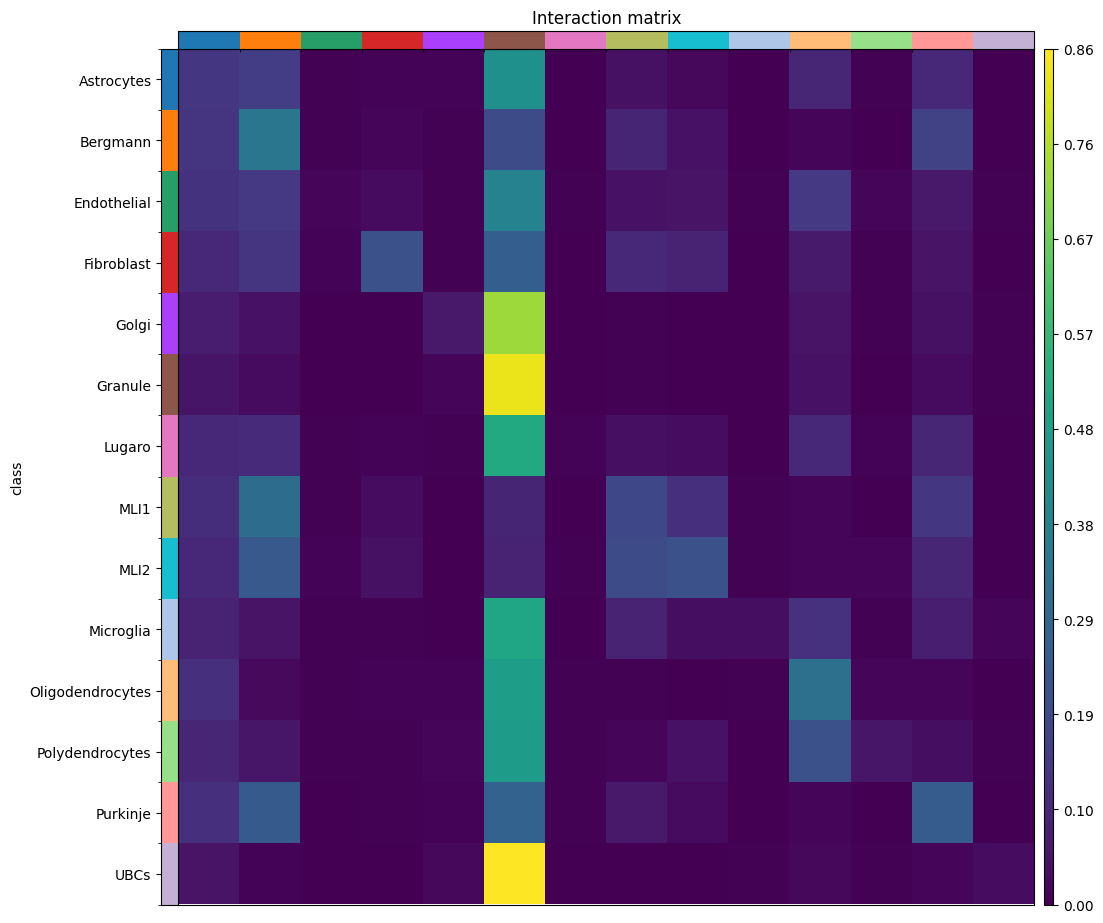

In [37]:
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="r50")
sq.pl.interaction_matrix(slideAnn, cluster_key="class")
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="r50", normalized=True)
sq.pl.interaction_matrix(slideAnn, cluster_key="class")

## r100

In [64]:
for i in np.arange(2):
    for j in np.arange(2):
        print([i,j])

[0, 0]
[0, 1]
[1, 0]
[1, 1]


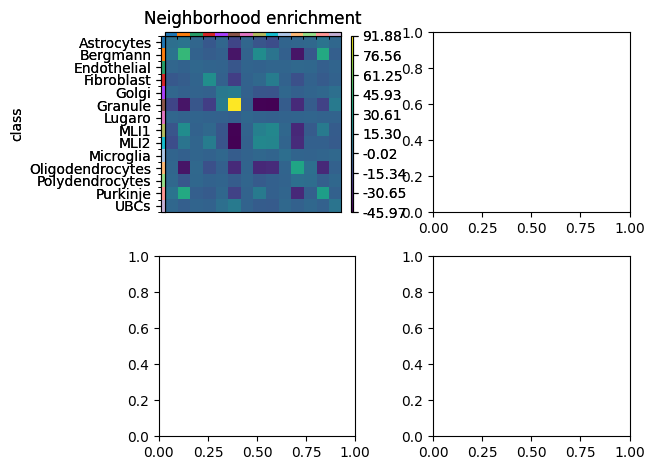

In [60]:
# sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r100")

fig, axes = plt.subplots(nrows = 2, ncols = 2)

axes[0,0]
axes[0,1]
axes[1,0]
axes[1,1]

sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore", ax = axes[0,0])
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore", ax = axes[0,0])

fig.tight_layout()

# plt.show

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.35/s]


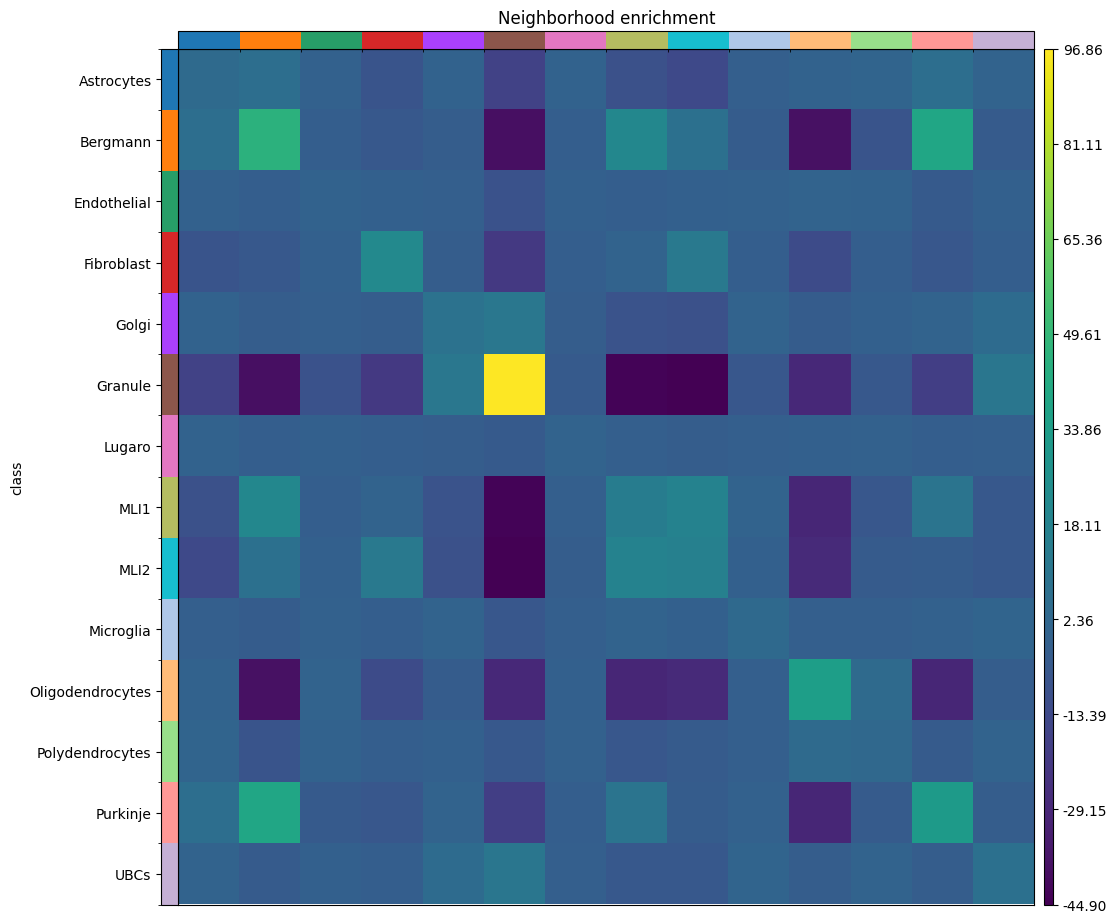

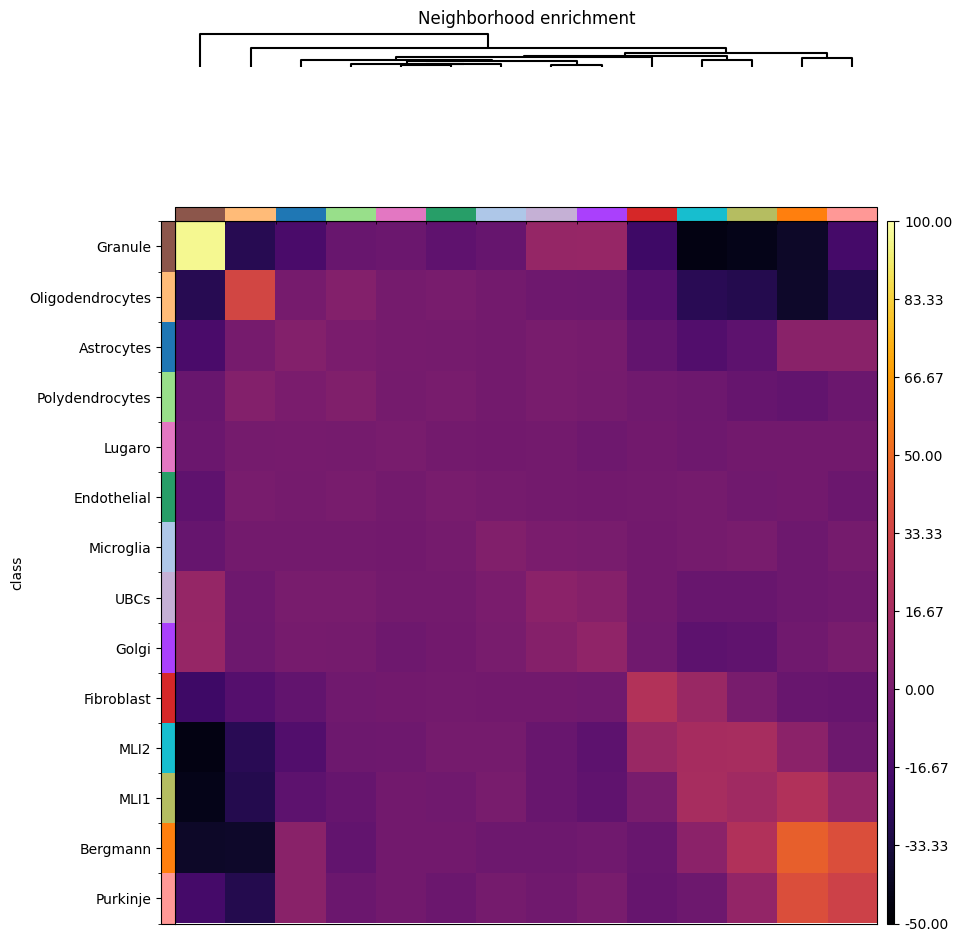

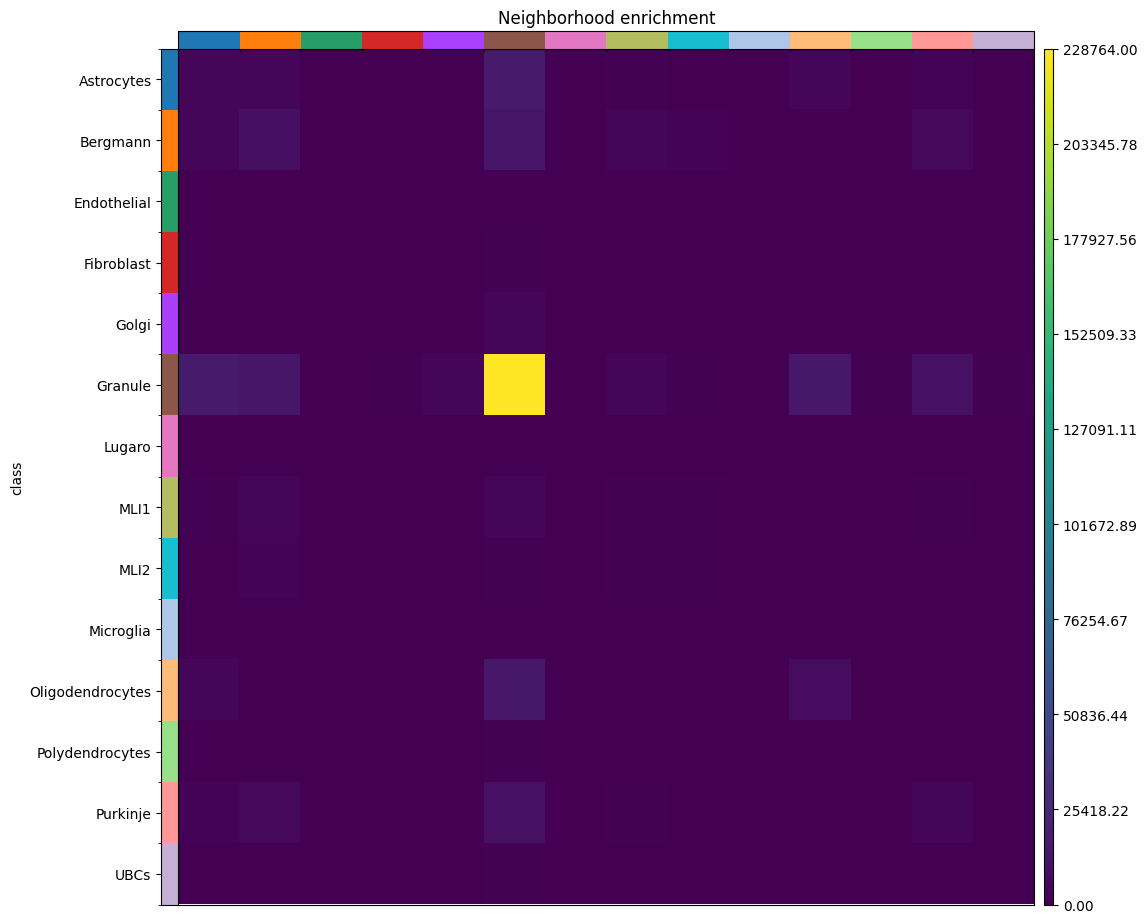

In [41]:
sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r100")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="zscore",
                       method="single", cmap="inferno", vmin=-50, vmax=100,
                      save="/Users/brendan/Desktop/slideseq.nhood.r100.png")
sq.pl.nhood_enrichment(slideAnn, cluster_key="class", mode="count")

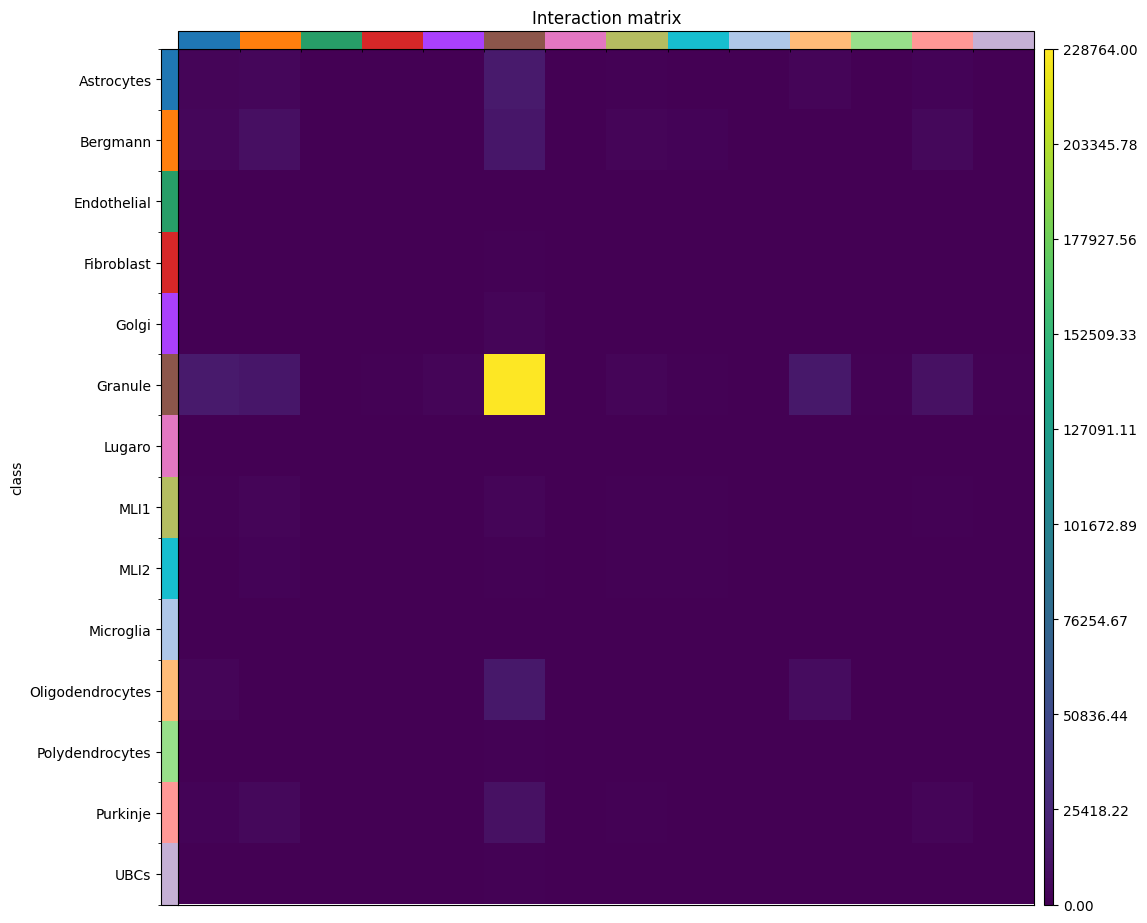

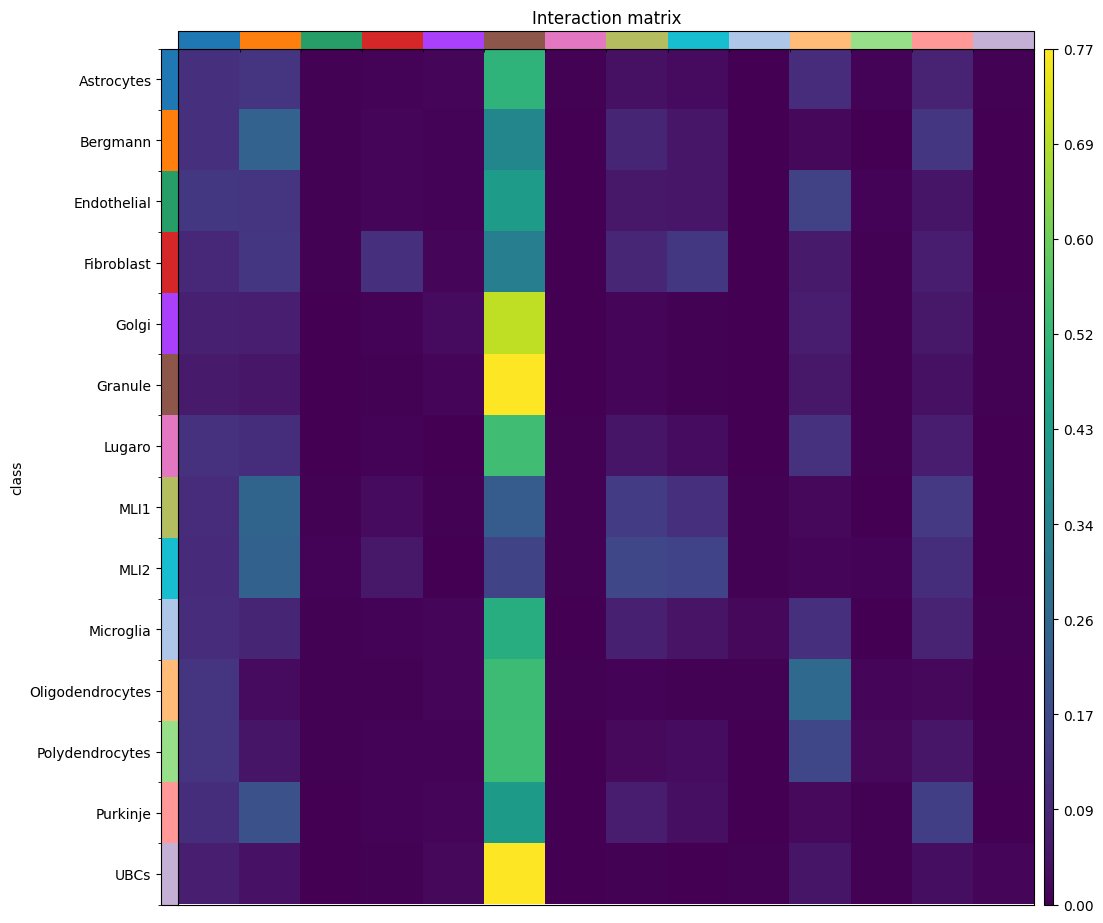

In [39]:
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="r100")
sq.pl.interaction_matrix(slideAnn, cluster_key="class")
sq.gr.interaction_matrix(slideAnn, cluster_key="class", connectivity_key="r100", normalized=True)
sq.pl.interaction_matrix(slideAnn, cluster_key="class")

## summarize nhoods

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 195.14/s]


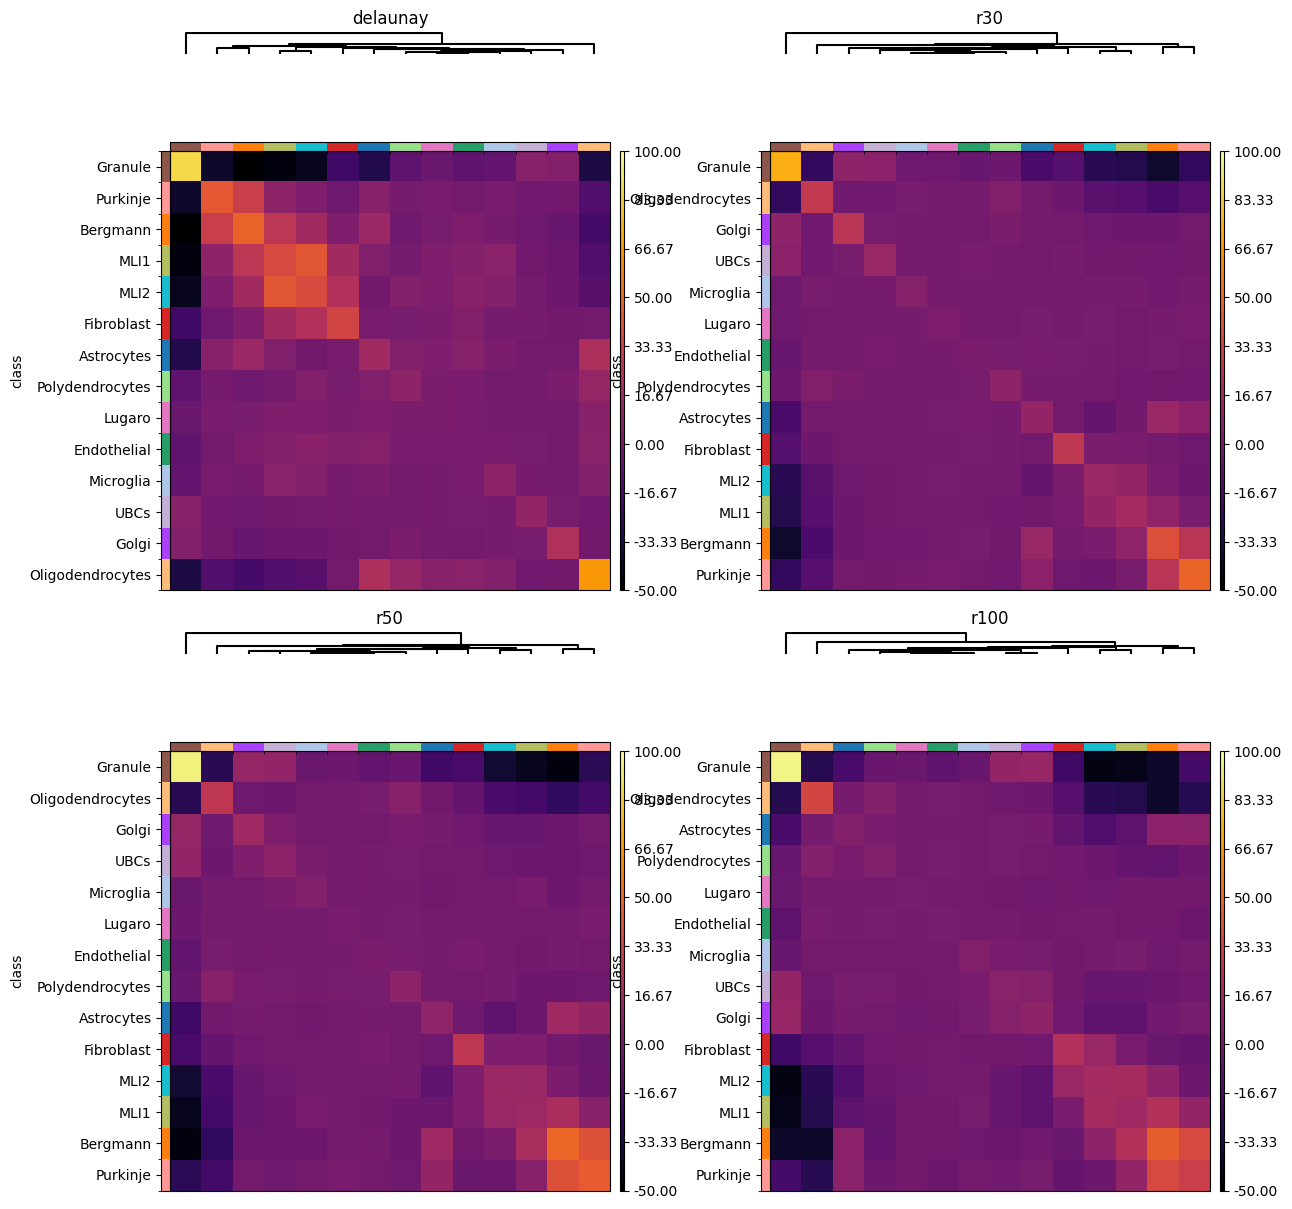

In [126]:
# sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r100")

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="delaunay")
sq.pl.nhood_enrichment(slideAnn,
                       cluster_key="class",
                       mode="zscore",
                       method="single",
                       cmap="inferno",
                       vmin=-50, vmax=100,
                       title = "delaunay",
                       ax = axes[0,0])

sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r30")
sq.pl.nhood_enrichment(slideAnn,
                       cluster_key="class",
                       mode="zscore",
                       method="single",
                       cmap="inferno",
                       vmin=-50, vmax=100,
                       title = "r30",
                       ax = axes[0,1])

sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r50")
sq.pl.nhood_enrichment(slideAnn,
                       cluster_key="class",
                       mode="zscore",
                       method="single",
                       cmap="inferno",
                       vmin=-50, vmax=100,
                       title = "r50",
                       ax = axes[1,0])

sq.gr.nhood_enrichment(slideAnn, cluster_key="class", connectivity_key="r100")
sq.pl.nhood_enrichment(slideAnn,
                       cluster_key="class",
                       mode="zscore",
                       method="single",
                       cmap="inferno",
                       vmin=-50, vmax=100,
                       title = "r100",
                       ax = axes[1,1])

plt.tick_params(axis='both', which='minor', labelsize=8)
fig.tight_layout(pad=0)

plt.savefig("/Users/brendan/Desktop/slideseqrctd_nhoods.png")